# Data Sciense Project


## Project structure:

1.   Project Skeleton
     1. Content list
     2. Writers
     3. Goal
     4. Mathmatical representation of the problem 
2.   Data
     1. data explanation
     2. data sample
     3. Visualisation functions
2.   Scoring of algorithms
     1. Air Quality Scores
     2. Regulation Valuation Score
     3. Final Score
3.   Algorithms
     1. Simple Algorithms
          1. DAO - always open
          2. Axe - open if lower outdoor
          3. Mountains Cut - greedy algorithm
     2. Genetic Algorithms
     3. Reinforcement Deep Learning
4. Summarize
     1. The oracle tell
     2. Comparison of the methods we used
     3. Summary of our project work process and the lessons learned


 

## Writers
Chai Leiman - id: 311227938

Rea Haas - id: 311600555

## Goal of the Project - Reduce Cancer, Save Lives

### Background
One of the major causes of mortality today is air pollution.
According to the WHO, World Health Organization, [an estimated 4.2 million premature deaths globally are linked to ambient air pollution.
](https://www.who.int/airpollution/ambient/health-impacts/en/)
According to the WHO, [people spend 86.9% of their time indoors](https://indoor.lbl.gov/sites/all/files/lbnl-47713.pdf), therefore [much of the damage is caused inside buildings due to indoor air pollution](https://ourworldindata.org/indoor-air-pollution#indoor-air-pollution-is-one-of-the-leading-risk-factors-for-premature-death).

A significant portion of the average persons day is spent inside business-type buildings, such as offices, shopping malls, etc. Our solution aims to reduce exposure to air pollutants within such structures.



#### How is it Done?
Such business-type buildings usually have a central fresh-air system that insert air from the outsider into the building. When the system detects that there is an increase in external air pollution, it closes the fresh air system and thus prevents the entry of polluted air from the outside.

### What are our Challenges?
1. Minimize the level of indoor air pollution
2. Keeping an adequate level of oxygen indoors

If oxygen were not an issue, closing the fresh-air system indefinitely would prevent air-pollution from seeping in. However, it is not possible to close the fresh-air system indefinitely since occupants of a building are in need of oxygen. Therefore international standards, some of which are enshrined in law, determine the amount of air that must enter the building at any  given time. By opening the fresh-air system we indeed allow in oxygen, but at the same time air-pollution enters as well.

#### ASHRAE 62.1


We are following the [ASHRAE 62.1](https://www.ashrae.org/technical-resources/bookstore/standards-62-1-62-2) standard for ventilation and indoor air quality. The standard instructs, given certain parameters of a building such as size and number of occupants, the maximum time that the fresh-air system can be closed per given time-window.

The following animation demonstrates the implementation of the ASHRAE 62.1 standard. Every square represents a time slot, meaning a fixed length of time, such as 5 minutes each. At every time slot, meaning every 5 minutes, we need to decide whether to open (green) or close (red) the fresh-air system. Prior to making the decision, we need to take the standard into account. The ASHRAE 62.1 standard instructs that for every window of 4 time-slots, meaning, for every 20 minutes, a maximum of 2 time-slots can be closed. In other words, having the fresh-air system closed for over 10 minutes out of a 20 minute time-window is a violation of the standard. Moreover, it is important to understand that the window of 20 minutes is dynamic. At first, the window consists of time-slots 1 to 4. At the end of time-slot number 1, the window shifts one time-slot forwards to consist of time-slots 2 to 5, and so forth. These shifts are demonstrated in the animation bellow.

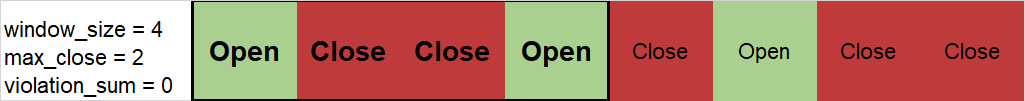

### The Goal of the Project



As mentioned above, our general goal is to find the optimal balance at every given moment of the day between closing the fresh-air system to prevent air-pollution from entering the building and opening the system to allow entrance of fresh air. To do this we will use a database of air-pollution data from the Ministry of Environmental Protection. **Our goal is to be able to determine for any given day, the best vector of openings for that day while taking into account the ASHRAE 62.1 standard. Meaning, given a specific day, what will be the optimal sequence of opening and closing the fresh-air system while following the standard.**

## Mathmatical Representation of the Problem:



Given a graph of the Outdoor Air Quality (OAQ), find the optimal sequence of opening/closing the ventilation of a building, to optimize the Indoor Air Quality (IAQ).

Input:
1. An N dimention vector that is a time series of the OAQ measuremenets values (floats).
2. Time window size (number of time-slots)
3. Maximum value of permitted closing during a time window 

Output:
An N dimention boolean vector that is a the optimal open/close values for this time window (True=open, False=close).

### Good solution definition:
A good solution will be an algorithm that produces an open/close vector that is the optimal vector, or close to the optimal vector.
We will build a measurement function to test our resultes.

## Complexity of the Problem


The challenge described above is even more complex when taking into accound the fact that the current indoor air status is affected by previous decisions reagarding opening or closing the fresh-air system. An additional factor that adds to the complexity of our probelem, is the large solution space, meaning there is a wide range of possible solutions.

Bellow are desplayed two binary trees, describing the large solution space. The trees display six time slots, representing 5 minutes each. At every time slot, meaning every 5 minutes, we need to decide whether to open (green) or close (red) the fresh-air system. For example, decision sequence [open --> open --> close --> close --> open --> close --> close] brings us to node number 99, and that is only after 35 minutes. As we progress in time, the number of solutions grows exponentially. In the picture bellow, we see that the size of the situational space of the problem is exponent to the size of the problem.
The first tree, "Full Tree", is a naive tree, desplaying the total number of options at every given time-slot. The second tree, "Only Valid Opens", desplays only the sequences that are possible given the limitations of the ASHRAE 62.1 stadard for ventilation. In the example bellow, the standard for ventilation limits us to maximum of 2 "close" for every 4 time-slots.

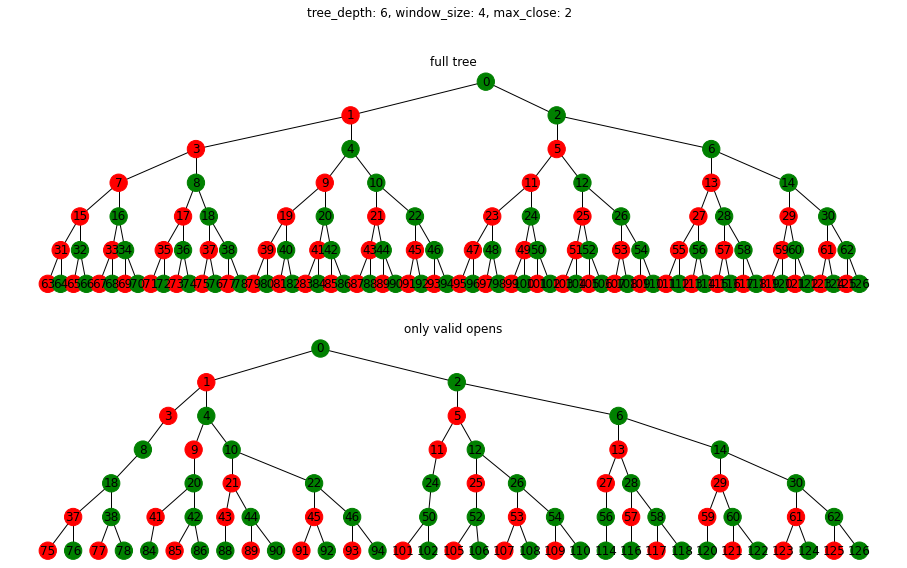

# Imports

In [ ]:
# %%capture
!pip install -U pandas==1.3.5  ## ?1.1.5
!pip install geneal==0.4.0
!pip install -U tensorflow==2.7.0
!pip install -U tf-agents==0.9.0  # 0.10.0  # ?0.11.0
!pip install -U matplotlib==3.1.3  # The latest version (3.5.0) not working
!pip install -U keras==2.7.0  # ==2.6.0

In [ ]:
!pip freeze

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.collections as collections

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

import tf_agents
from tf_agents import agents, environments, metrics
from tf_agents.trajectories import time_step
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.policies import random_tf_policy

import seaborn as sns
from geneal.genetic_algorithms import BinaryGenAlgSolver
from functools import partial
from itertools import product
from typing import Any, Callable

# from tensorforce.environments import Environment
# from tensorforce.agents import Agent
# from tensorforce.execution import Runner

import datetime


In [ ]:

gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [ ]:
DTYPE = tf.float32

In [ ]:
# This variable effect the runtime of the notebook.
# This variable is use to set the number of epochs for all the learning algoritems.
# For quick run, set to 1.
# For normal run, set to 5.
# for long run set to 10.
epochs_base_const = 1
quick_run = True

# Data

In [ ]:
example_day = np.array([38.4, 36.7, 36.6, 42.3, 46. , 36.2, 31.8, 32.6, 32.3, 32.2, 32.6,
       32.6, 33.1, 32.3, 33.2, 34.4, 35.6, 34.1, 30.8, 30.9, 32.4, 34.1,
       35.2, 33.5, 33.1, 32.3, 31.7, 32.6, 36. , 40.6, 40.9, 41.5, 44.2,
       39.7, 39.5, 41.1, 42. , 39.8, 41.1, 42.1, 40.8, 38.8, 42.1, 48.6,
       55.2, 57.8, 55.4, 50.1, 45. , 42. , 50.2, 63.3, 73. , 76.9, 78.8,
       74.9, 64.1, 59.8, 60.3, 53.7, 56.1, 54.2, 52. , 53.9, 58. , 60.9,
       55.6, 51.3, 49.3, 53.6, 57.4, 58. , 56.3, 52.4, 50.1, 50.8, 52.9,
       57.9, 57.5, 58.9, 56.6, 58. , 65.7, 72.9, 74.4, 70.4, 74. , 75.6,
       69.7, 61.2, 31.1, 28.4, 24.3, 25.3, 25.1, 21.4, 20.2, 22.6, 18.8,
       16.2, 17.6, 20.7, 21. , 20.6, 20.4, 22.3, 21.3, 18.4, 21.8, 19. ,
       17.1, 15.8, 13.6, 17.2, 14.7, 13.1, 15. , 13.5, 12.3, 11.4,  9. ,
        7.1, 10.8, 14.2, 12. ,  9. ,  8.3, 11.4, 10.9,  9.2,  7.4,  7.9,
        9.9,  7.4,  6.5,  8.3,  7.9,  6.2,  6.9,  8.3,  6. ,  7.1,  8.6,
        8.5,  7.4,  8.2,  9.4, 10.4,  9.3, 10.4,  9.4,  8.5,  6.5,  9.3,
       11.3, 10.8, 12.9, 10.8, 14.5, 16.8, 12. , 14.7, 12.8, 13.9, 11.3,
       11.5, 13.5, 16.3, 13.4, 15.8, 15. , 18.9, 19.3, 18.2, 26.2, 29.7,
       29.5, 26.7, 24.8, 28.8, 39.8, 41.6, 35.1, 38.3, 35.9, 39. , 43.1,
       41.2, 38. , 37.5, 35.6, 36.8, 38.7, 46.8, 62.9, 60.6, 51.6, 46.4,
       45.7, 45.8, 47.4, 53.5, 60. , 71.1, 77.1, 76.5, 75.3, 69.9, 68.9,
       61.6, 59.1, 62.8, 72.1, 73. , 69.9, 69.2, 66.3, 54.2, 46.2, 48.1,
       55.2, 54.5, 53.7, 50.4, 49.6, 49.7, 55.3, 61.5, 58.6])

In [ ]:
example_day.shape


import data

In [ ]:
data = None
try:
  df = pd.read_pickle("/content/data for rea.pkl")
  data = tf.constant(df.values, dtype=DTYPE)
  X_train = data 
except:
  X_train = tf.cast(tf.tile([example_day], (100,1)), dtype=DTYPE) 

X_train

# Scores

## Standard Violations

We decided to implement the violations count of the ASHRAE 62.1 standard using convolution of 1D arrays between the logical not of the decisions array (open is `False` and close is `True`)
and array full of ones with size of `window_size`. The result array is an array where the i'th element is the number of closes at the i window.
Then we count the number of violations of the standard there were.

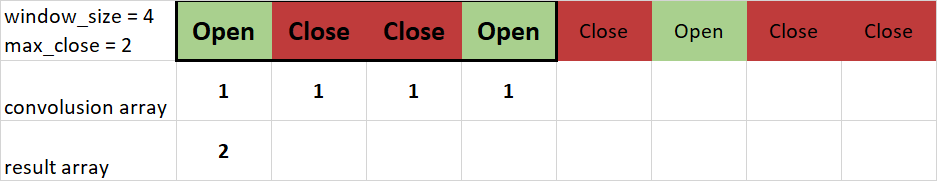

In [ ]:
#numpy backend version
def tmViolations(opens:'np.ndarray[np.bool]', window_size:int, maxClose:int)-> int:
  """
  returns the number of time management violations
  param: opens:
  param: window:
  param: maxClose: 
  """
  closes = np.logical_not(opens)
  windows_open_time_array = np.convolve(closes, np.ones(window_size), "valid")
  invalid_windows_array = windows_open_time_array > maxClose
  violations_number = invalid_windows_array.sum()
  return violations_number
  
def is_valid_closed(opens:'np.ndarray[np.bool]', window:int, maxClose:int)-> bool:
  return tmViolations(opens, window, maxClose) == 0

In [ ]:
#tensotflow backend version
@tf.function
def batchTmViolations(opens, window_size, maxClose):
  """
  returns the number of time management violations
  param: opens: array of booleans with shape of [batch_size, day_length]
  param: window: the reference window by the standard 
  param: maxClose: the maximum valid closing period in window
  """
  closes = tf.logical_not(opens)
  day_length = closes.shape[-1]
  batch_closes = tf.reshape(closes,(-1,day_length,1))#reshapes to (batch_size, day_length, 1) even if given 1d array (then it will be in (1, day_length, 1) shape)
  data   = tf.cast(batch_closes, dtype=DTYPE) 
  kernel = tf.ones((window_size,1,1), dtype=DTYPE)

  windows_open_time_array = tf.nn.conv1d(data, kernel, stride=1, padding='VALID')
  
  invalid_windows_array = windows_open_time_array > tf.cast(maxClose, dtype=DTYPE)

  violations_number = tf.math.count_nonzero(invalid_windows_array, axis=1, dtype=DTYPE)#tf.norm(tf.cast(preds,tf.int16),ord=1)
  return tf.squeeze(violations_number)

## Standard Violations Speed Tests

Data for performance testing

In [ ]:
batch_size = 1000
day_length = 229 
opens_test_batch = np.random.rand(batch_size,day_length)> 0.5
data_test_batch = np.random.rand(batch_size,day_length) * 100 +5


In [ ]:
opens_test_batch.shape

In [ ]:
%%timeit 
if not quick_run:
  window, maxClose = np.random.randint(10,20),np.random.randint(2,9)
  batchTmViolations(opens_test_batch, window, maxClose)

In [ ]:
%%timeit 
if not quick_run:
  window, maxClose = np.random.randint(10,20),np.random.randint(2,9)
  batchTmViolations(tf.constant(opens_test_batch), tf.constant(window), tf.constant(maxClose, dtype=DTYPE))

In [ ]:
%%timeit 
if not quick_run:
  window, maxClose = np.random.randint(10,20),np.random.randint(2,9)
  np.array([tmViolations(decisions, window, maxClose) for decisions in opens_test_batch])

Clearly the Tensoflow backend when using tensors is faster



## Air Quality Scores

This is a simple model that assumes that after ventilation, the air indoors is a linear combination of the air that entered the building and the air that was already in the building. 

In [ ]:
# when computing how much pollution enters the building
FROM_OUT_WEIGHT = 0.25
FROM_IN_WEIGHT = 0.75

def iaqc(out_polution:float, iaq:float) -> float:
  '''gets the outdoor data and the indoor air quality [IAQ] and returns the computed new IAQ '''
  return FROM_OUT_WEIGHT*out_polution + FROM_IN_WEIGHT*iaq


We decided to measure the preformance of the algorithm by comparing the amount of air pollution that was in the building and the amount of air pollution that was outside the bulding during a given day.


In [ ]:
def iaqScore(day:'np.ndarray[np.float]', decisions:'np.ndarray[np.bool]') -> (float, 'np.ndarray[np.float]'):
  '''gets the day and the decisions for that day, and compute the indoor air quality for each point and returns the sum of the IAQ devided the sum of the day pollution'''
  assert day.shape == decisions.shape 
  
  iaq_day = np.zeros_like(decisions, dtype="float")  # init new array for the IAQ
  iaq = day[0] #assume the starting pollution is as the first pollution of the day
  for slot, decision in np.ndenumerate(decisions):
      #if decieds to open
      if decision > .5: #for compitability with numeric decitions
          #compute the new indoor value
          iaq = iaqc(day[slot],iaq)
      iaq_day[slot] = iaq
  score =  iaq_day.sum()/day.sum()
  return score, iaq_day
  

In [ ]:
@tf.function
def tf_iaqScore_helper(iaq, params):
  decision, out  = params
  if tf.cast(decision, tf.bool):#for compitability with numeric decitions
      return iaqc(out, iaq)
  else:
    return iaq

@tf.function
def tf_iaqScore_logic(day, decisions):
  '''gets the day and the decisions for that day, and compute the indoor air quality for each point and returns the sum of the IAQ devided the sum of the day pollution'''
  init_iaq = day[0] #assume the starting pollution is the first pollution of the day
  iaq_day = tf.scan(tf_iaqScore_helper, elems = (decisions,day), initializer = init_iaq)
  score =  tf.reduce_sum(iaq_day)/tf.reduce_sum(day)
  return score, iaq_day

@tf.function
def tf_iaqScore(day, decisions):
  day = tf.cast(day, DTYPE) #seperated here so batch function can use the logic also
  return tf_iaqScore_logic(day, decisions)
  

In [ ]:
@tf.function
def batch_helper(params):
  decisions, day = params
  score,_ = tf_iaqScore_logic(day, decisions)
  return score

@tf.function
def batch_iaq_score(batch_days, batch_decisions):
  '''gets the day and the decisions for that day, and compute the indoor air quality for each point and returns the sum of the IAQ devided the sum of the day pollution'''
  batch_days = tf.cast(batch_days, DTYPE)
  scores = tf.vectorized_map(batch_helper, elems = (batch_decisions,batch_days))
  return scores  

## Air Quality Speed Tests

In [ ]:
%%timeit 
if not quick_run:
  a,b = tf.random.uniform([]).numpy(), tf.random.uniform([]).numpy()
  iaqc(a,b)

In [ ]:
%%timeit 
if not quick_run:
  day, decisions = tf.random.uniform([day_length]).numpy(), tf.random.uniform([day_length]).numpy() > .5
  x,_ = iaqScore(day, decisions)
  tf.cast(x, dtype=DTYPE)

In [ ]:
%%timeit 
if not quick_run:
  day, decisions = tf.random.uniform([day_length]), tf.random.uniform([day_length]) > .5
  iaqScore(day.numpy(), decisions.numpy())

In [ ]:
%%timeit 
if not quick_run:
  day, decisions = tf.random.uniform([day_length]), tf.random.uniform([day_length]) > .5
  tf_iaqScore(day, decisions)

In [ ]:
%%timeit 
if not quick_run:
  batch_iaq_score(data_test_batch,opens_test_batch)

In [ ]:
%%timeit 
if not quick_run:
  batch_iaq_score(tf.constant(data_test_batch),tf.constant(opens_test_batch))

In [ ]:
%%timeit 
if not quick_run:
  [iaqScore(day, decisions)[0] for day, decisions in zip(data_test_batch, opens_test_batch)]

## Final Score

The following scoring function is a combination of the standard violations count and the IAQ score.

In [ ]:
@tf.function
def batch_minimize_score(batch_days, batch_opens, window_size, maxClose):
  return batch_iaq_score(batch_days, batch_opens) + batchTmViolations(batch_opens, window_size = window_size, maxClose = maxClose)

In [ ]:
@tf.function
def tf_minimize_score(day, opens, window_size, maxClose):
  '''score to use when you want to minimize'''
  score , _ = tf_iaqScore(day, opens)
  return score + batchTmViolations(opens, window_size = window_size, maxClose = maxClose)

In [ ]:
@tf.function
def tf_maximize_score(day, opens, window_size, maxClose):
  '''score to use when you want to maximize'''
  return -tf_minimize_score(day, opens, window_size, maxClose)

In [ ]:
def minimize_score(day, opens, window_size, maxClose):
  '''score to use when you want to minimize'''
  score , _ = iaqScore(day, opens)
  return score + tmViolations(opens, window_size = window_size, maxClose = maxClose)

In [ ]:
def maximize_score(day, opens, window_size, maxClose):
  '''score to use when you want to maximize'''
  return -minimize_score(day, opens, window_size, maxClose)

In [ ]:
def iaq_score_by_algo(day:'np.ndarray[np.float]', 
                      algo: Callable[[], Any],
                      window: int,
                      max_close: int) -> float:
  decisions = algo(day, window, max_close)
  score = minimize_score(decisions, day, window, max_close)
  return score

# Visualization

To present the Algorithm's performance, we will create a graph that displays the outside air-pollution (in blue), the algorithm's decisions (openings in green, closings in red), and the resulted indoor air-pollution (in orange)

In [ ]:
def fill_ax_for_ploting_decisions(ax: 'matplotlib.pyplot.axes', day:'np.ndarray[np.float]',iaq:'np.ndarray[np.float]', decisions:'np.ndarray[np.bool]'):
  x = range(day.size)

  ax.plot(x,day, color = 'blue')
  ax.plot(x,iaq, color = 'darkorange')
  ax.set_ylim(bottom = 0)
  ymin, ymax = ax.get_ylim()
  
  # coloring the background with green for open or red for closed.
  for i, value in enumerate(decisions):
    color = "green" if value else "red"
    ax.axvspan(i-0.5, i+0.5, facecolor=color, alpha=0.35)


def show(day:'np.ndarray[np.float]',iaq:'np.ndarray[np.float]', decisions:'np.ndarray[np.bool]'):
  assert day.shape == decisions.shape
  
  fig, ax = plt.subplots(figsize=(20,10))
  
  fill_ax_for_ploting_decisions(ax, day, iaq, decisions)
  
  fig.tight_layout()

# Algorithms

In [ ]:
algorithms_scores = {}
algorithms_decisions = {}
algorithms_runtime_duration ={}

In [ ]:
print(algorithms_scores)
print(algorithms_decisions)
print(algorithms_runtime_duration)

In [ ]:
example_window = tf.constant(24)
example_max_close = tf.constant(7)

In [ ]:
# global values: example_window.numpy(), example_max_close.numpy()

def run_and_save_algo(algo: callable, day_to_use):
    start_time = datetime.datetime.now()
    decisions = algo(day_to_use, example_window.numpy(), example_max_close.numpy())
    end_time = datetime.datetime.now()
    runtime_duration = (end_time - start_time).microseconds

    score, indoor_air = iaqScore(day_to_use, decisions)
    
    algorithms_decisions[algo.__name__] = decisions
    algorithms_scores[algo.__name__] = maximize_score(day_to_use, algorithms_decisions[algo.__name__], example_window.numpy(), example_max_close.numpy())
    algorithms_runtime_duration[algo.__name__] = runtime_duration
    
    return score, indoor_air, decisions

## Benchmark Algorithms

We will present a few basic analitical algorithms as a benchmark.

### Daily Always Open

The most naive algorithm that meets the conditions, and the one that is in practice implemented in all of the buildings, is of course the one that opens all the time.

In [ ]:
def dao(day:'np.ndarray[np.float]', window:int = None, max_close:int = None) -> 'np.ndarray[np.bool]':
  return np.ones(example_day.shape, dtype=bool)

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(dao, day_to_use)


show(day_to_use, indoor_air, decisions)
display(f"DAO algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

In [ ]:
print(algorithms_runtime_duration)

### AXE - open if lower outdoors

The next naive algorithm the also prevents air-pollution from entering the building, simply closes when the indoor air-pollution is higher than the outdoor air-pollution, while taking into account the ventilation standard 

In [ ]:
def axe_decision(oaq_value: float,
                 iaq_value: float,
                 window_open: 'np.ndarray[np.bool]',
                 window: int,
                 max_close: int):
    # add one "close" slot to the end of the window:
    OPEN = True
    window_open.append(not OPEN)
    if not is_valid_closed(window_open, window=window, maxClose=max_close):
      return OPEN
    else:
      return oaq_value < iaq_value
  
def axe(day:'np.ndarray[np.float]', window:int, max_close:int) -> 'np.ndarray[np.bool]':
  decisions = []
  iaq_value = day[0]
  
  for oaq_value in day:
    decision = axe_decision(oaq_value, iaq_value, decisions[-window:], window, max_close)
    decisions.append(decision)
    if decisions[-1]:
      iaq_value = iaqc(oaq_value, iaq_value)

  return np.array(decisions)   

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(axe, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"AXE algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

### Mountains cut


We created an additional algorithm that is heuristicly based.

The aim of the following algorithm is to find the "most advantageous closing point" at each given time, and decide what to do then. If it is possible to close at that time according to the ventilation standard, then it will close, and if not, then it will leave it open and continue on to the next "most advantageous closing point"

In [ ]:
NOT_DEFIEND = -1
OPEN = True
CLOSED = not OPEN

def not_defined_to_open(trinary_array) -> 'np.ndarray[np.bool]':
    opens_decisions =  np.array(trinary_array) != CLOSED
    return opens_decisions


def mountains_cut(day:'np.ndarray[np.float]', window:int, max_close:int) -> 'np.ndarray[np.bool]':
    closed_points = np.full(day.shape, NOT_DEFIEND)
    max_indexs = np.flip(np.argsort(day))

    for max_index in max_indexs:
        closed_points[max_index] = CLOSED

        temp_decisions = not_defined_to_open(closed_points)        
        if is_valid_closed(temp_decisions, window=window, maxClose=max_close):
            continue  # the colsed was valid...
        else:
            closed_points[max_index] = OPEN  

    score, indoor_air = iaqScore(day, closed_points)

    for i, d in enumerate(closed_points):
        if day[i] < indoor_air[i]:
            closed_points[i] = OPEN
    # print("optimize: \n{c}".format(c=closed_points))
    
    return closed_points

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(mountains_cut, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"mountains_cut algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

## Genetic algorithem

The following genetic algorithm draws inspiration from life and the Theory of Evolution. The purpose is to create a greedy heuristic algorithm for finding the optimum of a problem. We do this by creating a set of possible solutions, we give each solution a score, and then pair the better solutions and "kill" the inferior solutions. In addition, we have methods for adding "mutations". The purpose of the mutations is to increase the variety of solutions and to give the inferior solutions a chance to pair up and form a consequent generation. This prevents the algorithm from getting stuck in a local minimum.

Our solution achieves a good result but it takes quite a long time (even though it technicaly runs in a linear complexity).

In [ ]:
def genetic_solution(day:'np.ndarray[np.float]', window:int, maxClose:int) -> 'np.ndarray[np.bool]':
  fitness_func = lambda opens: maximize_score(day, opens, window, maxClose)
  solver = BinaryGenAlgSolver(
    n_genes=len(day),
    fitness_function=fitness_func, 
    n_bits=1, # number of bits describing each gene (variable)
    pop_size=700, # population size (number of individuals)
    max_gen=epochs_base_const*100, # maximum number of generations
    mutation_rate=0.0075, # mutation rate to apply to the population
    selection_rate=0.33, # percentage of the population to select for mating
    selection_strategy="roulette_wheel", # strategy to use for selection.
    verbose = not False,
    show_stats = False,
    plot_results = False,
  )
  solver.solve()
  return solver.best_individual_

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(genetic_solution, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"genetic algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

## Deep learning

In retrospect we understood that the problem is harder than we had originally thought. Therefore we will try using various approaches to do an overfit for one day, as a sanity test. The reasoning being that if an easy overfit fails, then training extensive data will likely fail as well. 

In this approach, instead of using a classic loss function, we use the score given by the openings as the loss function.

How is this done? A loss function is basically a function that receives two arguments: the output of the network and an additional argument. In classic supervised learning, this argument is the desired output of the network, but this is not obligatory. We used the argument to give the loss function the daily pollution, which is used along with the network output in order to calculate the daily score.

In [ ]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

day_length = X_train.shape[1]
display(day_length)

In [ ]:
@tf.function
def minimize_loss(days, preds):
  return batch_minimize_score(days, preds, window_size = example_window, maxClose = example_max_close)

In [ ]:
@tf.function
def probabilities_to_boolean(probabilities_array, training = None): #get_action
    input_shape = tf.shape(probabilities_array)
    #bit random in training and deterministic when not
    threshhold = tf.random.uniform(shape = input_shape) if training else tf.constant(.5, dtype=DTYPE)
    return probabilities_array > threshhold

#### Naive approch

We will try to directly use the score function as the loss function

In [ ]:
classic_model = keras.models.Sequential([
    keras.layers.LayerNormalization(input_dim=day_length),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Reshape((-1,1)),
    keras.layers.Conv1D(filters=32, kernel_size=(example_window.numpy(),)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(day_length, activation="sigmoid"),
    keras.layers.Lambda(probabilities_to_boolean)
], name = 'naive_model')

classic_model.summary()

The loss function receives the network results and a pre-defined inputs (usually the desired values), and issues some sort of score based on that. In this case we gave the loss function the days as pre-defined values and together with the openings that the network outputs, the loss function calculates the daily score 

In [ ]:
classic_model.compile(loss=minimize_loss, optimizer="adam")
try:
  classic_model.fit(X_train, X_train, batch_size = 64, epochs = epochs_base_const*5, validation_split = 0.1)
except ValueError as e:
  print(e.args[0].rpartition('\n\n    ')[-1])

This approach failed since the loss function is either non-derivative or has a derivative of zero regarding the commands. That is, the loss function acts as a "stair function" of some sort.

To make things simple, we will demonstrate this on a day of 10 samples (meaning, there will be a space of 1024 sets of possible decisions - 2^10). We will calculate the score for each set of decisions and will receive the following graph (the minimum is highlighted in red)

In [ ]:
n=10
preds = tf.constant(list(product([True,False],repeat=n)))
days = tf.cast(tf.tile([example_day[:n]], (len(preds),1)), dtype=DTYPE)
scores = batch_minimize_score(days, preds, tf.constant(n-2), maxClose = tf.constant(n//3))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(scores,drawstyle='steps-mid', marker ='o',markerfacecolor='red',markevery=[tf.argmin(scores).numpy()])
ax.set_xlim([0,2**n])
fig.tight_layout()

As mentioned before, the method of directly using the score function as a loss function did not work. Therefore, in order to create a loss function that is derivative, we will train networks that will mimic the loss function and use them as a loss function.

##### Training loss network


The score calculation is composed of two parameters: First, the number of times we violated the regulation by closing the ventilation. Second, the amount of pollution we prevented. Since direct training did not work, we will try a slightly different training approach. We built two networks, each mimicking a function, and then combined them together as layers in an integrated funcional model.

###### Data generator for "Loss network"

The generator creates fabricated days that consist of randomly made-up levels of pollution and random openings and closings. It should be noted that the generator is not true to any existing data and therefore less sequential. For training purposes, we will transfer this data into a model that is aimed to mimic the loss function.

In [ ]:
# general datagenerator

# call as:
# 1. network tm_violations_helper:  tm_dg = DataGenerator(tm_violations_helper, window_size=example_window, maxClose=example_max_close) 
# 2. network batch_iaq_score:       iaq_dg = DataGenerator(batch_iaq_score)


class DataGenerator(keras.utils.Sequence):
    """
    Generates data for keras loss networks. 
    :return: A generator object that implement the "next()" function.
    """
    def __init__(self, batch_scoring, batch_size=32, shuffle=True, **batch_scoring_kargs):
        'Initialization'
        self.batch_size = batch_size
        
        # scoring params
        self.batch_scoring = batch_scoring
        self.max_val = 100
        self.day_length = len(example_day)
        self.batch_scoring_kargs = batch_scoring_kargs
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return 100

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate data
        X, y = self.__data_generation()

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

    def __data_generation(self):
        'Generates data containing batch_size samples' 
        # Initialization
        days = tf.random.uniform(shape = (self.batch_size, self.day_length), maxval=self.max_val)
        decisions = tf.round(tf.random.uniform(shape = (self.batch_size, self.day_length)))

        Y = self.batch_scoring(days, tf.cast(decisions,tf.bool), **self.batch_scoring_kargs)
        X = tf.stack([days, decisions], axis =1) #return shape (batch_size, 2, day_length)
        return X, Y


In [ ]:
def tm_violations_helper(day, opens,  *args, **kargs):
  return batchTmViolations(opens, *args, **kargs)

# Generator
tm_generator = DataGenerator(tm_violations_helper, window_size=example_window, maxClose=example_max_close, batch_size=128)


#### TM net

We will define a network that is aimed to mimic the function that calculates the number of ventilation regulation violations. Since the network receives a binary vector (zeros and ones) as input, then there is a problem that the zeros "turn-off" the neurons. Therefore we first put a normalization layer that initializes the connection with "ones", so that the zeros are transferred to the network as a value other than zero.

In [ ]:
# Design model
# Architecture
model_violations = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(2, day_length)), # recived [day, decisions]
    keras.layers.Lambda(lambda x: x[:, 1]),  # remove the part of the "day" recived by the generator, here we only interested in the "desicions" part.
    keras.layers.LayerNormalization(beta_initializer = 'ones'),
    # keras.layers.Reshape((-1,1)),
    # keras.layers.Conv1D(filters=4, kernel_size=(example_window.numpy(),)), # filters=32
    # keras.layers.Flatten(),
    keras.layers.Dense(day_length - (example_window-1), activation="relu"),
    # keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1),
],name = "tm_score_model")

model_violations.summary()


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model_violations.compile(loss='mse', optimizer=optimizer, metrics=["mae"])

The next cell allow us to train a network with changeing the learning rate of the learning process. This action is helpfull to quickly train the network at the beggining, and allow more precise learning as the learing process is going on.

In [ ]:
def train_model_with_learning_rate_range(model, min_learning_rate: int, max_learning_rate: int):
    for i in range(min_learning_rate, max_learning_rate):
        print(f"i={i}, learning_rate: {10 ** -i}")
        # model_violations.optimizer = keras.optimizers.Adam(learning_rate=10 ** -i)
        K.set_value(model.optimizer.learning_rate, 10 ** -i)
        model.fit(tm_generator, epochs=epochs_base_const*2, validation_data=tm_generator)

In [ ]:

train_model_with_learning_rate_range(model_violations, 3 , 6)
    # model_violations.fit(tm_generator, epochs=1000, validation_data=tm_generator)

# After ~25 apoches the network loss value stabalize with those values:
# Epoch 500/500

# 100/100 [==============================] - 3s 35ms/step - loss: 41.8520 - mae: 4.4132 - val_loss: 41.8245 - val_mae: 4.5713
# 100/100 [==============================] - 10s 100ms/step - loss: 78.0285 - mae: 6.6489 - val_loss: 71.4765 - val_mae: 6.5776

In [ ]:
# Save the model. This is commented out to allow full run of the notebook.
# tf.keras.models.save_model(model_violations, "model_violations_only_dense_layer_2200_epoches.h5")


##### TM net trainnig

Training network: only 1 Dense layer with (day_length - (example_window-1)) neorons, and a second Dense layer to sum it. no convulotion layer.

Epoch 199/200
100/100 [==============================] - 1s 14ms/step - loss: 57.0698 - mae: 5.4967 - val_loss: 61.0760 - val_mae: 5.3381

Epoch 200/200
100/100 [==============================] - 1s 13ms/step - loss: 54.4774 - mae: 5.4024 - val_loss: 57.9389 - val_mae: 5.2452
<tensorflow.python.keras.callbacks.History at 0x7f4918af8850>

train 200 more apoches: (total of 400)

Epoch 199/200
100/100 [==============================] - 1s 13ms/step - loss: 46.5804 - mae: 4.9022 - val_loss: 49.9185 - val_mae: 4.9435

Epoch 200/200
100/100 [==============================] - 1s 13ms/step - loss: 46.3859 - mae: 4.8300 - val_loss: 49.5456 - val_mae: 5.2111
<tensorflow.python.keras.callbacks.History at 0x7f4918fee390>

train 600 more apoches: (total of 1000)

Epoch 599/600
100/100 [==============================] - 2s 16ms/step - loss: 44.2327 - mae: 4.5011 - val_loss: 43.8462 - val_mae: 4.6221

Epoch 600/600
100/100 [==============================] - 2s 16ms/step - loss: 43.5605 - mae: 4.5297 - val_loss: 44.2052 - val_mae: 4.4679
<tensorflow.python.keras.callbacks.History at 0x7f4918e83490>

train 600 more apoches: (total of 1600)

Epoch 599/600
100/100 [==============================] - 1s 15ms/step - loss: 30.2108 - mae: 3.7182 - val_loss: 29.3280 - val_mae: 3.7389
Epoch 600/600
100/100 [==============================] - 2s 16ms/step - loss: 29.8563 - mae: 3.7247 - val_loss: 28.8577 - val_mae: 3.5995
<tensorflow.python.keras.callbacks.History at 0x7f4918e04a90>

train 600 more apoches: (total of 2200)

100/100 [==============================] - 2s 16ms/step - loss: 16.4375 - mae: 2.9318 - val_loss: 15.8881 - val_mae: 2.9590
Epoch 600/600

100/100 [==============================] - 2s 16ms/step - loss: 15.5105 - mae: 2.9128 - val_loss: 15.9718 - val_mae: 2.8704
<tensorflow.python.keras.callbacks.History at 0x7f4918e83390>

Training: 4 filter in the convulotion layer.

Epoch 99/100
100/100 [==============================] - 4s 35ms/step - loss: 62.2390 - mae: 5.8461 - val_loss: 59.2680 - val_mae: 5.6213

Epoch 100/100
100/100 [==============================] - 4s 35ms/step - loss: 62.8819 - mae: 5.9137 - val_loss: 61.7635 - val_mae: 5.4766
<tensorflow.python.keras.callbacks.History at 0x7f4918799390>

train 200 more apoches: (total of 300)

Epoch 199/200
100/100 [==============================] - 4s 36ms/step - loss: 44.9927 - mae: 4.8197 - val_loss: 46.8314 - val_mae: 4.7050

Epoch 200/200
100/100 [==============================] - 4s 36ms/step - loss: 
47.8316 - mae: 4.9384 - val_loss: 52.1949 - val_mae: 4.8155
<tensorflow.python.keras.callbacks.History at 0x7f4919112090>

train 200 more apoches: (total of 500)


Epoch 199/200
100/100 [==============================] - 4s 37ms/step - loss: 42.1251 - mae: 4.5120 - val_loss: 41.6142 - val_mae: 4.3005

Epoch 200/200
100/100 [==============================] - 4s 35ms/step - loss: 42.6882 - mae: 4.4851 - val_loss: 41.8070 - val_mae: 4.3309
<tensorflow.python.keras.callbacks.History at 0x7f4918365a50>

Training: only 1 filter in the convulotion layer.

Epoch 99/100
100/100 [==============================] - 3s 27ms/step - loss: 57.9428 - mae: 5.5985 - val_loss: 57.9487 - val_mae: 5.6419

Epoch 100/100
100/100 [==============================] - 3s 27ms/step - loss: 59.4634 - mae: 5.6960 - val_loss: 55.4362 - val_mae: 5.6257
<tensorflow.python.keras.callbacks.History at 0x7f490fa75610>

Train with 229 filters in the convolution layer.

Epoch 1/100
100/100 [==============================] - 62s 618ms/step - loss: 1556.7528 - mae: 21.7123 - val_loss: 89.5971 - val_mae: 7.4003

Epoch 2/100
100/100 [==============================] - 62s 617ms/step - loss: 90.1419 - mae: 7.2280 - val_loss: 81.0774 - val_mae: 7.0908

Epoch 3/100
100/100 [==============================] - 62s 616ms/step - loss: 83.8718 - mae: 6.9920 - val_loss: 79.1181 - val_mae: 6.6291

Epoch 4/100
100/100 [==============================] - 62s 617ms/step - loss: 79.8979 - mae: 6.8313 - val_loss: 78.9902 - val_mae: 7.0794

Epoch 5/100
100/100 [==============================] - 62s 616ms/step - loss: 81.0100 - mae: 6.9017 - val_loss: 107.7526 - val_mae: 6.6161

Epoch 6/100
100/100 [==============================] - 62s 617ms/step - loss: 76.8204 - mae: 6.6775 - val_loss: 80.5437 - val_mae: 6.5771

Epoch 7/100
100/100 [==============================] - 62s 616ms/step - loss: 80.2520 - mae: 6.7645 - val_loss: 78.7381 - val_mae: 6.1367

Epoch 8/100
100/100 [==============================] - 62s 616ms/step - loss: 89.1232 - mae: 7.1479 - val_loss: 73.6196 - val_mae: 6.6503

Epoch 9/100
100/100 [==============================] - 61s 615ms/step - loss: 78.2839 - mae: 6.7109 - val_loss: 73.4172 - val_mae: 6.7398

Epoch 10/100
100/100 [==============================] - 62s 618ms/step - loss: 85.2402 - mae: 6.9922 - val_loss: 76.3829 - val_mae: 7.0322

Epoch 11/100
100/100 [==============================] - 63s 635ms/step - loss: 87.5664 - mae: 7.1137 - val_loss: 77.3624 - val_mae: 7.0253

Epoch 12/100
100/100 [==============================] - 64s 636ms/step - loss: 85.7426 - mae: 6.9934 - val_loss: 76.1271 - val_mae: 6.9607

It's take too much time and not improving.

#### IAQC net

We will define a network that is aimed to mimic the function that calculates the score for the minimizing of pollution in the building, by changing openings and closings of the ventilation system.

Since this network experiences a similar problem of binary input, we solved the problem with a similar normalization layer. 

In [ ]:
# Generators
iaq_generator = DataGenerator(batch_iaq_score)
# Design model
# Architecture
model_iaq = keras.models.Sequential([
    keras.layers.LayerNormalization(beta_initializer = 'ones',input_shape=(2, day_length)),
    keras.layers.Dense(day_length*2, activation="relu"),
    keras.layers.Dense(day_length*2, activation="relu"),
    keras.layers.Dense(day_length*2, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(1),
], name = "iaq_score_model")
model_iaq.compile(loss='mse', optimizer="adam", metrics=["mae"])

model_iaq.summary()

In [ ]:
model_iaq.fit(iaq_generator, epochs=epochs_base_const*1, validation_data=iaq_generator)
# After ~10 apoches the network loss value stabalize with those values:
# 100/100 [==============================] - 3s 26ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0024 - val_mae: 0.0394


#### combined

We will define a network that will give the final score by combining the two networks that mimic the partial-score functions 

In [ ]:
commonInput = keras.layers.Input(shape=(2, day_length))

out1 = model_iaq(commonInput)    
out2 = model_violations(commonInput)    

merged = keras.layers.Add()([out1,out2])
model_scoring = keras.Model(inputs=[commonInput], outputs=merged)
model_scoring.summary()

In [ ]:
final_generator = DataGenerator(batch_minimize_score, window_size=example_window, maxClose=example_max_close, batch_size=128)


In [ ]:
model_scoring.compile(loss='mse', optimizer="adam", metrics=["mae"])

In [ ]:
model_scoring.evaluate(final_generator)

In [ ]:
def loss_by_combined_net(days, preds):
    input_to_model_iaq =  tf.stack([days, preds], axis=1)
    scoring = model_scoring(input_to_model_iaq)
    return tf.reshape(scoring, [-1])#flatten

In [ ]:
# Predict with the model_scoring

decisions_axe = axe(example_day, window=example_window.numpy(), max_close=example_max_close.numpy())
decisions_dao = dao(example_day, window=example_window.numpy(), max_close=example_max_close.numpy())
decisions_all_closed = np.zeros(example_day.shape)

days = np.array([example_day, example_day, example_day])
decisions = np.array([decisions_axe, decisions_dao, decisions_all_closed])

print(loss_by_combined_net(days, decisions))
# print(minimize_loss(days, tf.cast(decisions,tf.bool)))


#### straightforward approch

We will now return to our original network and will train it a few epochs with the score network

In [ ]:
classic_model.summary()

In [ ]:
model2 = keras.Model(inputs=classic_model.input, outputs=classic_model.layers[-2].output)
model2.summary()

In [ ]:
model2.compile(loss=loss_by_combined_net, optimizer="adam")
model2.fit(X_train, X_train, batch_size = 64, epochs = epochs_base_const*20, validation_split = 0.1)

##### pretraining approch

Trying pre-training for the algorithm may help since it's not progressing much

In [ ]:
# train model to allways open to start with
model2.compile(loss='binary_crossentropy', optimizer="adam")
allways_open = tf.ones(X_train.shape, dtype=X_train.dtype)
model2.fit(X_train, allways_open, batch_size = 64, epochs = epochs_base_const*2, validation_split = 0.1)

In [ ]:
print(model2.predict(X_train))

In [ ]:
model2.compile(loss=loss_by_combined_net, optimizer="adam")

In [ ]:
model2.fit(X_train, X_train, batch_size = 64, epochs = epochs_base_const*10, validation_split = 0.1)

In [ ]:
def combined_network(day, window:int, max_close:int):
  return probabilities_to_boolean(model2.predict(tf.expand_dims(example_day,0))[0])

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(combined_network, day_to_use)

print(score)
show(day_to_use, indoor_air, decisions)

### Reinforcement Learning


#### Self build policy gradient

##### policy gradient

In [ ]:
gp_model = keras.models.Sequential([
    keras.layers.LayerNormalization(input_dim =day_length),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Reshape((-1,1)),
    keras.layers.Conv1D(filters=32, kernel_size=(example_window.numpy(),)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(day_length, activation="sigmoid")],
    name= "PG_net")
gp_model.summary()
iteration = 0

We will run the model on days, and take the outputs vector from the network, which represents the opening profitability at any given moment, and convert the vector to absolute openings (meaning a bianry vector). We will run crossentropy between the profitability and the binary vector, this way we are theoretically telling the network "what you just did - is good", while at the same time "record" the gradient. We then will calculate the score that day would have received, and normalize it in relation to other scores, that way scores that are lower than avergae will receive a positive number around 1, and the scores that are above average will receive a negative number around -1. We will then multiply the normalized score by the gradients weights we saved. This tells the network to avoid weights that gave a relatively high score, and to move towards weights that gave a relatively low score.

In [ ]:
#utility function
@tf.function(experimental_relax_shapes=True)
def multiply_each_grad_by_reward(grad, rewards):
  len = rewards.shape[0]
  grad_shape = tf.shape(grad)
  reshaped_grad = tf.reshape(grad,(len,-1))
  weighted_grad = rewards*reshaped_grad
  return tf.reshape(weighted_grad, grad_shape)


In [ ]:
def get_iteration_step_func():
  # because optimizer creates variables when apply_gradients is called for the first time on it tf.function don't premit to reuse this function.
  # refer to https://github.com/tensorflow/tensorflow/issues/27120#issuecomment-540071844
  @tf.function
  def iteration_step(data, model, optimizer, play_one_day_func, iteration = 0, buffer = None):
    rewards, all_grads = tf.map_fn(lambda day: play_one_day_func(day, model), data, fn_output_signature=(DTYPE, [tf.float32]*len(model.trainable_variables)))
    if buffer is not None: buffer.add_batch(rewards)
    all_rewards = buffer.gather_all() if buffer is not None else rewards

    mean = tf.reduce_mean(all_rewards)
    std = tf.math.reduce_std(all_rewards)
    min = tf.math.reduce_min(all_rewards)
    tf.print("Iteration: ", iteration, ", mean rewards: ", mean, ", std rewards: ", std, ", best reward: ", min) 
    normalized_rewards = (mean - rewards)/std #lower rewards will be positive numbers 
    all_mean_grads = [tf.reduce_mean(multiply_each_grad_by_reward(grads, normalized_rewards), axis = 0) for grads in all_grads]
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))
  return iteration_step

In [ ]:
@tf.function
def play_one_day(day, model):#normal
  day_as_batch = tf.expand_dims(day,0)
  with tf.GradientTape() as tape:
    open_proba = model(day_as_batch, training=True)
    actions = probabilities_to_boolean(open_proba, training=True)
    y_target = tf.cast(actions, DTYPE)
    main_loss = keras.losses.binary_crossentropy(y_target, open_proba)
  grads = tape.gradient(main_loss, model.trainable_variables)
  reward = minimize_loss(day_as_batch, actions) 
  return reward, grads


Here too, we will begin training a network to open consistently

In [ ]:
gp_model.compile(loss='binary_crossentropy', optimizer="adam")
allways_open = tf.ones(X_train.shape, dtype=X_train.dtype)
gp_model.fit(X_train, allways_open, batch_size = 64, epochs = epochs_base_const*1, validation_split = 0.1)

In [ ]:
buff = tf_uniform_replay_buffer.TFUniformReplayBuffer(data_spec=tf.TensorSpec([1], tf.float32) , batch_size=X_train.shape[0] )#optional

In [ ]:
buff.data_spec

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-5, name='pg_opt')

In [ ]:
iteration_step = get_iteration_step_func()
for i in tf.range(epochs_base_const*29):
  iteration += 1
  iteration_step(X_train, gp_model, optimizer, play_one_day, iteration, buff)

In [ ]:
def self_build_policy_gradient(day, window:int, max_close:int):
    pred = gp_model.predict(day_to_use.reshape(1,-1))
    decisions = probabilities_to_boolean(pred[0], True)    
    return decisions

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(self_build_policy_gradient, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"self build policy gradient algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

#### Pointer Network

In the [attached article](https://arxiv.org/pdf/1611.09940.pdf) it seems like using pointer networks produced good results, therefore we will try that as well.

######create model

We will build the model according to the instructions in the article

In [ ]:
class Attention(keras.layers.Layer):
  """Attention layer"""
  def __init__(self, hidden_dimensions, name='attention'):
    super().__init__(name=name, trainable=True)
    self.W1 = keras.layers.Dense(hidden_dimensions, use_bias=False)
    self.W2 = keras.layers.Dense(hidden_dimensions, use_bias=False)
    self.V = keras.layers.Dense(1, use_bias=False)

  def call(self, encoder_outputs, dec_output, mask=None):
    w1_e = self.W1(encoder_outputs)
    w2_d = self.W2(dec_output)
    tanh_output = keras.activations.tanh(w1_e + w2_d)
    v_dot_tanh = self.V(tanh_output)
    if mask is not None:
        v_dot_tanh += (mask * -1e9)
    attention_weights = keras.activations.softmax(v_dot_tanh, axis=1)
    att_shape = K.shape(attention_weights)
    return K.reshape(attention_weights, (att_shape[0], att_shape[1]))

In [ ]:
class Decoder(keras.layers.Layer):
  """Decoder class for PointerLayer"""
  def __init__(self, hidden_dimensions):
    super().__init__()
    self.lstm = keras.layers.LSTM(hidden_dimensions, return_sequences=False, return_state=True)

  def call(self, x, hidden_states):
    dec_output, state_h, state_c = self.lstm(x, initial_state=hidden_states)
    return dec_output, [state_h, state_c]

  def get_initial_state(self, inputs):
    return self.lstm.get_initial_state(inputs)

  def process_inputs(self, x_input, initial_states, constants):
    return self.lstm._process_inputs(x_input, initial_states, constants)

In [ ]:
class PointerLSTM(keras.layers.Layer):
  """PointerLSTM"""

  def __init__(self, hidden_dimensions, name='pointer', **kwargs):
    super().__init__(name=name, **kwargs)
    self.hidden_dimensions = hidden_dimensions
    self.attention = Attention(hidden_dimensions)
    self.decoder = Decoder(hidden_dimensions)

  def call(self, x, training=None, mask=None, states=None):
    """
    :param Tensor x: Should be the output of the encoder
    :param Tensor states: last state of the encoder
    :param Tensor mask: The mask to apply
    :return: Pointers probabilities
    """
    time_d_length = K.shape(x)[1]
    en_seq = x
    x_input = x[:, -1, :]
    x_input = K.repeat(x_input, time_d_length)

    if states:
        initial_states = states
    else:
        initial_states = self.decoder.get_initial_state(x_input)

    constants = []
    preprocessed_input, _, constants = self.decoder.process_inputs(x_input, initial_states, constants)
    constants.append(en_seq)
    last_output, outputs, states = K.rnn(self.step, preprocessed_input,
                                          initial_states,
                                          go_backwards=self.decoder.lstm.go_backwards,
                                          constants=constants,
                                          input_length=time_d_length
                                         )

    return outputs

  def step(self, x_input, states):
    x_input = K.expand_dims(x_input,1)
    _, [h, c] = self.decoder(x_input, states[:-1])

    en_seq = states[-1]
    time_d_length = K.shape(en_seq)[1]
    dec_seq = K.repeat(h, time_d_length)
    probs = self.attention(dec_seq, en_seq)
    return probs, [h, c]

  def get_output_shape_for(self, input_shape):
    # output shape is not affected by the attention component
    return (input_shape[0], input_shape[1], input_shape[1])

  def compute_output_shape(self, input_shape):
    return (input_shape[0], input_shape[1], input_shape[1])

###### try it on

In [ ]:
hidden_size = 128


main_input = keras.layers.Input(shape=(None, 1), name='main_input')
encoder, state_h, state_c = keras.layers.LSTM(hidden_size, return_sequences = True, return_state=True, name="encoder")(main_input)
decoder = PointerLSTM(hidden_dimensions=hidden_size, name="decoder")(encoder,states=[state_h, state_c])

ptr_model = keras.Model(main_input, decoder, name = 'pointer_model')
ptr_model.summary(120)


The network returns a pointer, therefore we will create functions that convert it to decisions.

In [ ]:
@tf.function
def pointers_to_boolean(pointers_array, training = None): #get_action
    max_val = tf.reduce_max(pointers_array, axis = -1, keepdims = True)
    return tf.equal(pointers_array, max_val)
@tf.function
def boolean_pointer_to_decision(pointers_array):
  return tf.reduce_any(pointers_array, axis = 1)


The following method is similar to the method in the previous section - policy gradient with feed forward neural network

In [ ]:
@tf.function
def play_one_day_pointer(day, model):#pointer
  day_as_batch = tf.expand_dims(day,0)
  with tf.GradientTape() as tape:
    pred = model(day_as_batch, training=True)
    pointers = pointers_to_boolean(pred, training=True)
    y_target = tf.cast(pointers, DTYPE)
    main_loss = keras.losses.binary_crossentropy(y_target, pred)
  grads = tape.gradient(main_loss, model.trainable_variables)
  actions = boolean_pointer_to_decision(pointers)
  reward = minimize_loss(day_as_batch, actions) 
  return reward, grads


In [ ]:
optimizer = keras.optimizers.Adam(name="ptr_opt")

In [ ]:
buff = tf_uniform_replay_buffer.TFUniformReplayBuffer(data_spec=tf.TensorSpec([1], tf.float32) , batch_size=X_train.shape[0] )#optional
iteration_step = get_iteration_step_func()

In [ ]:
buff.data_spec

The next cells are commented out till we will figure out the problem related to the "play_one_day". 

In [ ]:
# gp_model.trainable_variables[0].shape

In [ ]:
# ptr_model.trainable_variables[0].shape

In [ ]:
# reward_gp, grads_gp = play_one_day(X_train[0], gp_model)
reward_ptr, grads_ptr = play_one_day_pointer(X_train[0], ptr_model)

In [ ]:
reward_ptr

In [ ]:
# reward_gp.shape

In [ ]:
# grads_gp[0].shape

In [ ]:
# reward_ptr.shape

In [ ]:
# grads_ptr[0].shape

In [ ]:
for iteration in tf.range(epochs_base_const*1):
  iteration_step(X_train, ptr_model, optimizer, play_one_day_pointer, iteration, buff)

In [ ]:
def pointers_network(day, window:int, max_close:int):
  return boolean_pointer_to_decision(pointers_to_boolean(ptr_model.predict(tf.expand_dims(day,0))))[0]

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(pointers_network, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"self build policy gradient algorithm got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

#### tf-agent

We will use (somewhat degenerately) the built-in infrusctructure of the tensorflow for reinforcement learning. We will create an environment that casts a polluted day and expects a desicions vector from the network, and returns a reward that is the obtained score.

In [ ]:
class OracelEnv(environments.py_environment.PyEnvironment):

    def __init__(self, shape = (229,)):
        self._shape = shape
        self._action_spec = tf_agents.specs.BoundedArraySpec(shape=self._shape, dtype=np.int32, minimum=0, maximum=1, name='action')
        self._observation_spec = tf_agents.specs.ArraySpec(shape=self._shape, dtype=np.float32, name='observation')
        self._state = example_day.astype(np.float32)
        self._episode_ended = True

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self._state = example_day.astype(np.float32)
        self._episode_ended = False

        return time_step.restart(self._state)

    def _step(self, action):
        if self._episode_ended:
            # The last action ended the episode. Ignore the current action and start
            # a new episode.
            return self.reset()
        self._episode_ended = True #it's one step game
        boolean_actions = tf.cast(action, tf.bool)
        reward = tf_maximize_score(self._state, boolean_actions, example_window, example_max_close)
        return time_step.termination(self._state, reward=reward)

In [ ]:
environments.utils.validate_py_environment(OracelEnv())
train_env = environments.tf_py_environment.TFPyEnvironment(OracelEnv())

In [ ]:
num_iterations = 250
collect_episodes_per_iteration = 2 
replay_buffer_capacity = 2000 

fc_layer_params = (512,)*5

learning_rate = 1e-4
log_interval = 25
num_eval_episodes = 10
eval_interval = 50


We will define a network

In [ ]:
actor_net = tf_agents.networks.actor_distribution_network.ActorDistributionNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)


We will create an agent

In [ ]:
# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

tf_agent = agents.reinforce.reinforce_agent.ReinforceAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    actor_network=actor_net,
    optimizer=optimizer,
    normalize_returns=True,
    train_step_counter=train_step_counter)
tf_agent.initialize()


We will define policies

In [ ]:
eval_policy = tf_agent.policy
collect_policy = tf_agent.collect_policy
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())


We will define a storage buffer

In [ ]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec = tf_agent.collect_data_spec,
    batch_size = train_env.batch_size,
    max_length = replay_buffer_capacity
    )

We will define metrics

In [ ]:
train_metrics = [
 metrics.tf_metrics.MaxReturnMetric(),
 metrics.tf_metrics.MinReturnMetric(),
 metrics.tf_metrics.AverageReturnMetric(),
]

We will collect a few random rounds so that we give a point of reference to the agents performance

In [ ]:
collect_driver = tf_agents.drivers.dynamic_episode_driver.DynamicEpisodeDriver(
    train_env,
    random_policy,
    observers = [replay_buffer.add_batch] + train_metrics,
    num_episodes = num_iterations)

In [ ]:
final_time_step, final_policy_state = collect_driver.run()


In [ ]:
for i in train_metrics:
     print(i.name,i.result())

In [ ]:
dataset = replay_buffer.as_dataset(
 sample_batch_size=64,
 num_steps=2,
 num_parallel_calls=3).prefetch(3)


In [ ]:
collect_driver.run = tf.function(collect_driver.run)
tf_agent.train = tf.function(tf_agent.train)


In [ ]:
def train_agent(n_iterations):
    time_step = None
    policy_state = tf_agent.collect_policy.get_initial_state(train_env.batch_size)
    iterator = iter(dataset)
    for iteration in range(n_iterations):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = tf_agent.train(trajectories)
        tf.print(f"\r{iteration} loss:{train_loss.loss.numpy():.5f}", end="")
    print('\n')
#         if iteration % log_interval == 0:
#             for i in train_metrics:
#                 print(i.name,i.result())

In [ ]:
train_agent(epochs_base_const*1)
for i in train_metrics:
    print(i.name,i.result())

In [ ]:
def tf_agent_call_function(day, window:int, max_close:int):
    """
    This function is used to get teh results from the "tf_agent".
    """
    asdf_dataset = replay_buffer.as_dataset(
      num_parallel_calls=3).prefetch(3)

    iterator = iter(asdf_dataset)
    trajectories, buffer_info = next(iterator)
    
    time_step = tf_agents.trajectories.TimeStep(
        step_type=trajectories.step_type,
        reward=trajectories.reward, 
        discount=trajectories.discount,
        observation=trajectories.observation
    )
    preds = tf_agent.policy.action(time_step)

    return preds.action

In [ ]:
day_to_use = example_day

score, indoor_air, decisions = run_and_save_algo(tf_agent_call_function, day_to_use)

show(day_to_use, indoor_air, decisions)
display(f"tf-agent got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

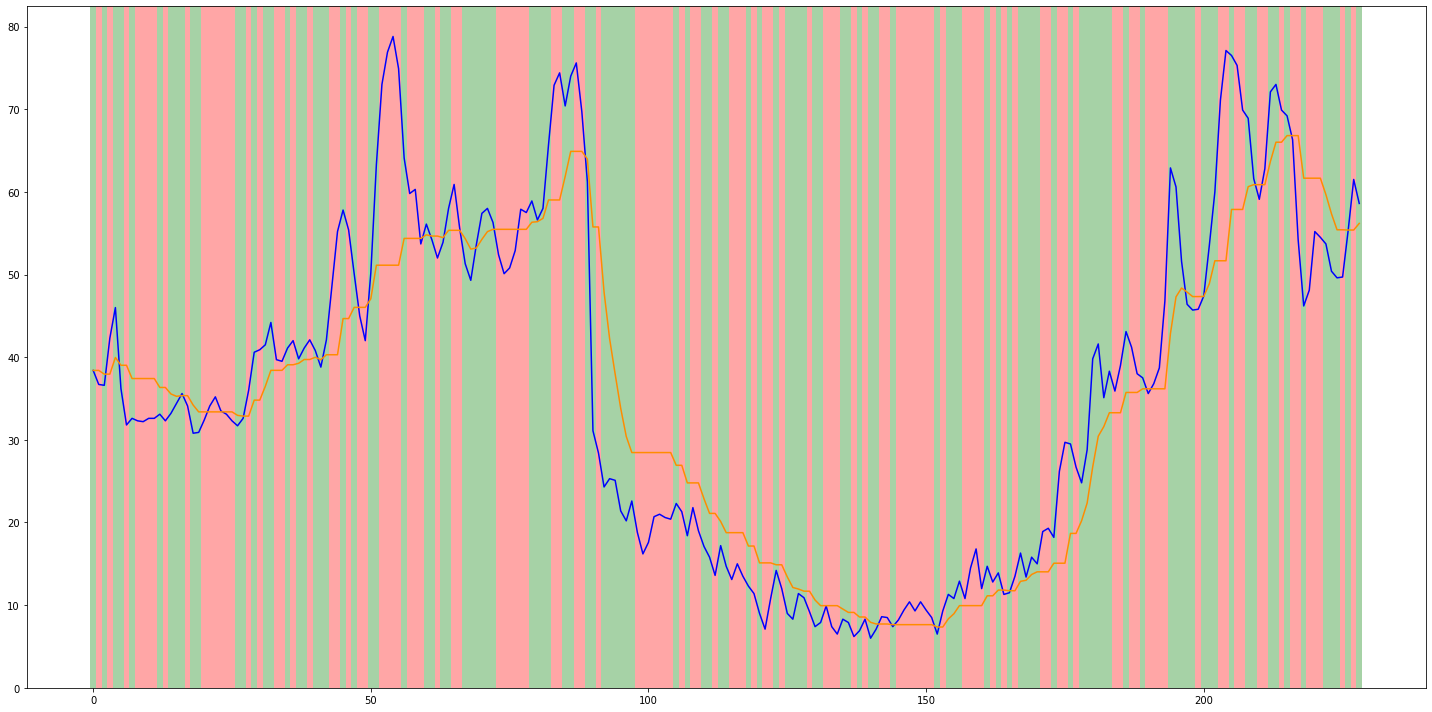

#### tensorforce

In [ ]:
# This flag is a hack to allow full run of the notebook without remove the tensorforce code.
# There is some packages dependency versions issue with other packages, so we are not running this section. 
is_should_run_tensorforce = False

We tried using a package where the majority of the parameters are predefined. We built the environment similarly to the tf-agents

In [ ]:
if is_should_run_tensorforce:
  class OracelEnvironment(Environment):

    def __init__(self, shape = (229,)):
      super().__init__()
      self._shape = shape

    def states(self):
      return dict(type='float', shape=self._shape)

    def actions(self):
      return dict(type='bool', shape=self._shape)

    def reset(self):
      self._state = example_day#np.random.uniform(0, 100, size = self._shape)
      return self._state

    def execute(self, actions):
      terminal = True
      reward = tf_maximize_score(self._state, actions, example_window, example_max_close)
      self._state = example_day#np.random.uniform(0, 100, size = self._shape)
      return self._state, terminal, reward.numpy()


In [ ]:
if is_should_run_tensorforce:
  environment = Environment.create(environment=OracelEnvironment)


We created an agent the is supposed to know independently which network architecture is preferable 

In [ ]:
if is_should_run_tensorforce:
  agent = Agent.create(
      agent='tensorforce', environment=environment, update=64,
      optimizer=dict(optimizer='adam', learning_rate=1e-4),
      objective='policy_gradient', reward_estimation=dict(horizon=20),
      exploration = dict(type='linear', unit='episodes', num_steps=1000, initial_value=1., final_value = 0.01) #linear decay
      )


In [ ]:
if is_should_run_tensorforce:
  runner = Runner(
      agent=agent,
      environment=environment
  )

In [ ]:
if is_should_run_tensorforce:
  runner.run(num_episodes=1000)


In [ ]:
if is_should_run_tensorforce:
  runner.run(num_episodes=100, evaluation = True)


In [ ]:
if is_should_run_tensorforce:
  day_to_use = example_day

  score, indoor_air, decisions = run_and_save_algo("?", day_to_use)

  show(day_to_use, indoor_air, decisions)
  display(f"tensorforce got score of {score} and is {'' if is_valid_closed(decisions, example_window.numpy(), example_max_close.numpy()) else 'not '}folowing the standard")

# Summarize

**Following is a summary of the project:**
1. The oracle tell
  * The problem we faced and the solution we tried.
  * Input and output data shapes.
  * Explanation of the methods we used
2. Comparison of the methods we used
  * Graph comparison
  * Results open-close graph all algorithems
3. Summary of our project work process and the lessons learned

## The oracle tell

**The problem we faced and the solution we tried**

The problem we chose for our work was defined by data. Its solution has the potential to save lives. 
Here is a summary of the work process and the results:


The problem we faced:

Our general goal was to find the optimal balance at every given moment of the day between closing the fresh-air system to prevent air-pollution from entering the building and opening the system to allow entrance of fresh air.

**Input and output data shapes:**

Given a graph of the Outdoor Air Quality (OAQ), find the optimal sequence of opening/closing the ventilation of a building, to optimize the Indoor Air Quality (IAQ).

**Explanation of the methods we used:**

A. Which method did we use?

B. What was the result?

C. What was limiting us in this way and how could it be improved - more computation time, more data, improvements in the algorithm, etc.


We took several approaches during the project:

1. Classic algorithms, which are very useful as a starting point but far from optimal and give an idea why the problem is not simple.

2. Genetic algorithm, which shows that by combining randomness and computational power, it is possible to achieve results that are competitive with traditional methods.

3. Deep learning: To find a solution to the problem, deep learning has been used in various ways.



**Deep learning methods:**

1. Initially, we tried the classic method, entering data and giving it a score in hopes that the network would get there on its own.

  * In this approach, instead of using a classic loss function, we use the score given by the openings as the loss function.

  * Results: This approach failed since the loss function is either non-derivative or has a derivative of zero regarding the commands. That is, the loss function acts as a "stair function" of some sort.

2. As mentioned before, the method of directly using the score function as a loss function did not work. Therefore, in order to create a loss function that is derivative, we will train networks that will mimic the loss function and use them as a loss function. 
  * The score calculation is composed of two parameters: First, the number of times we violated the regulation by closing the ventilation. Second, the amount of pollution we prevented. Since direct training did not work, we will try a slightly different training approach. We built two networks, each mimicking a function, and then combined them together as layers in an integrated funcional model.

  * Results: We didn't succeded to overfit the network to our needs, so we guess we could not use it. (If the network can't overfit on a preticular set of data, it can't predict the general case...)

3. Reinforcement Learning - Self build policy gradient
  * We implemented a policy gradient algorithm and used that to solve the problem.

  * Results: Network convergence did not produce good results

4. Reinforcement Learning - Pointer network

  * Based on an article we saw, we tried some policy gradient infrastructure using another network architecture, that might be a better option.
  * Results: The network's training time was really long and its performance wasn't very good

5. Reinforcement Learning - tf-agent
  * TF provides a built-in policy gradient infrastructure that we tested.
  * Results: Resulted in no results. The agent didn't succeded to learn the first step of the problem of the regulation policy.

6. Reinforcement Learning - tensorforce
  * Tensorforce provides a reinforcement learning infrastructure that should be very automatic.
  * Results: Resulted in no results


## Comparison of the methods we used

Let us stop here and gather the results of the work we have done and make conclusions.

In the next section we will compare the results for each algorithm. We will refer in the summary only to the results that bore fruit, That is, bring about minimal results that are worth reference - better than the trivial algorithm of DOA.
 
For the algorithms that did not bear fruit we will explain why we think we did not reach the results.


### Graph comparison

After all that work of trail and error, let's try to put it all toghter into graphs, that will help use to understand the strangth of each strategy. The graphs will help to compare easily between the different algorithms.

#### Scores graph

Compares the scores that the different algorithms have achieved.

Remainder: The score is the ratio of the total indor polution to the outdor total polution (and include regulation vaiolations as punish to this score).

This is an explanation of the scoring: 


Algorithms that provide results compliant with regulatory restrictions will receive a score in this range: (-1, 0).

An algorithm that violates regulatory restrictions will receive a score that is lower than -1, which is the range (-infaty, -1).

An optimal algorithm will receive a score closest to 0 (from below).

**General overview of the graphs**

1. The graph shows that the deep learning algorithms failed to account for the regulatory constraints, which resulted in bad scores.
Without studying the limitations of regulation, an algorithm will not work because it cannot be used. The pollution saving scores of these algorithms weren't optimal, but even if they were, we couldn't use them because of the regulatory violations (it is unfair to obtain a good score if regulations can be broken. for example, run the "AXE" algorithm without maintaining the regulations).

2. For the same day we are working with, the learning algorithm and the genetic algorithm return different results for different runs. In other words, the result is not deterministic.
A large part of this result is due to the fact that we use random data to train the deep learning algorithms, which is created using a generator we have developed.
It is not surprising that genetic algorithms consistently return different results since their results are determined by randomness.

**Algorithms with the best results**

These algorithms produced the best scores:
Mountain_cut and Genetic Algorithm.
Both received a score of -0.92
which means the air inside would be eight percent cleaner than the air outside if they were used.
Mountain_cut always produces the same result, whereas Genetic_algorithm gets better the deeper we go into the generations.
In the case of genetic algorithms, we cannot ensure that increasing the number of generations indefinitely will result in the optimal outcome since it may be that we "fall" to a local minimum from which the algorithm does not succeed.

In [ ]:
# the commented code is if we want to add more scores stats
def compare_stats(df_data: 'pd.DataFrame', field_name: 'str', title: 'str', palette_color: 'str'):

  # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 8))
  fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

  # score:
  sns.barplot(ax=ax1, x="algorithm", y=field_name, data=df_data, palette=palette_color)
  ax1.set_title(title)

  for i, v in enumerate(zip(df_data[field_name])):  # , ars_results, avg)):
      ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
  
  # Show the final plot
  plt.show()

In [ ]:
df_score = pd.DataFrame(algorithms_scores.items(), columns=['algorithm', 'iaq_score'])
display(df_score)
compare_stats(df_score, field_name="iaq_score", title="iaq_score", palette_color="Blues")

Full run of the notebook: #1
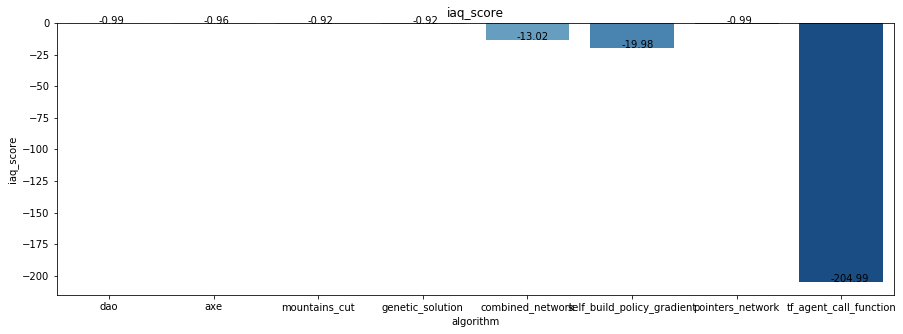

Full run of the notebook: #2
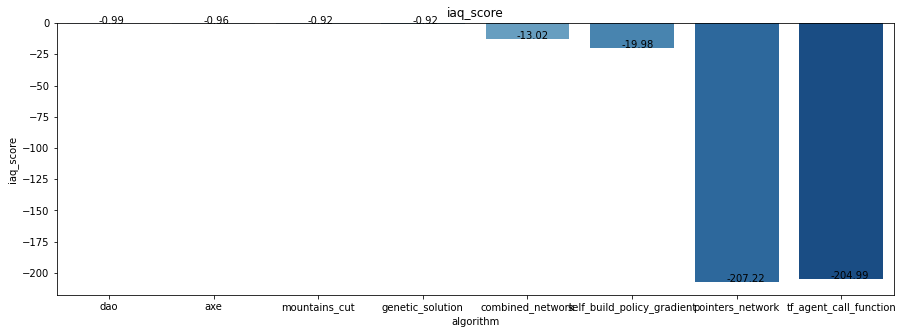

#### Time duration graph

Compare the time duration that the different algorithms took to run (Not the learning time, still we will talk about the learning time in this section).

This is an explanation of the scoring:

The algorithm runtime is less important to us, yet it is a handy and easy parameter to compare through.

It is optimal to get the runtime closest to zero.


**General overview of the graphs**

1. The graph shows that the results of the deep learning algorithms take longer than that of the classical algorithms. This is not surprising.

2. The classic algorithms will run at a fixed time (according to the computer you're using) every time we run them on the same data, and it does not matter how much time we add to them.

3. Learning algorithms consider time as an important factor in their output. Perhaps the network will perform better if we train it more?
We might get better results if we allow more generations in the genetic algorithm?
At some point, the learning algorithms converged to a certain value and the network was unable to learn "more".
As for the genetic algorithm, we tried all sorts of different parameters for the number of generations or probability of mutation, but we did not achieve much better results, so we will assume the algorithm has reached its maximum potential here as well.

**Algorithms with the best results**

Not surprisingly, the classic algorithms produced better results for run time, but they were not meaningful in terms of solving the problem.

In [ ]:
df_runtime_duration = pd.DataFrame(algorithms_runtime_duration.items(), columns=['algorithm', 'runtime_duration'])
display(df_runtime_duration)
compare_stats(df_runtime_duration, field_name="runtime_duration", title="runtime_duration ms", palette_color="Reds")

Full run of the notebook: #1
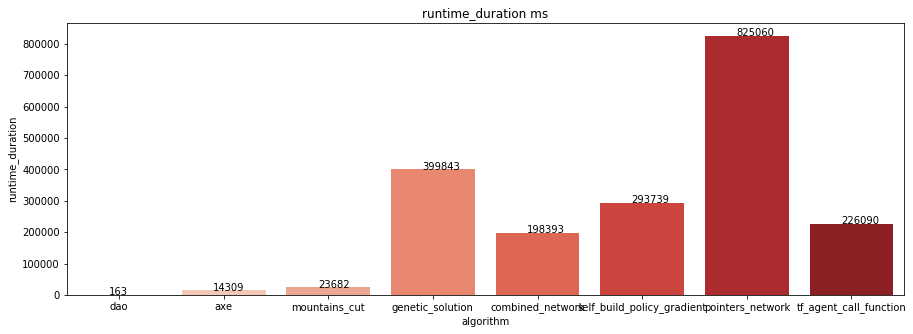

Full run of the notebook: #2
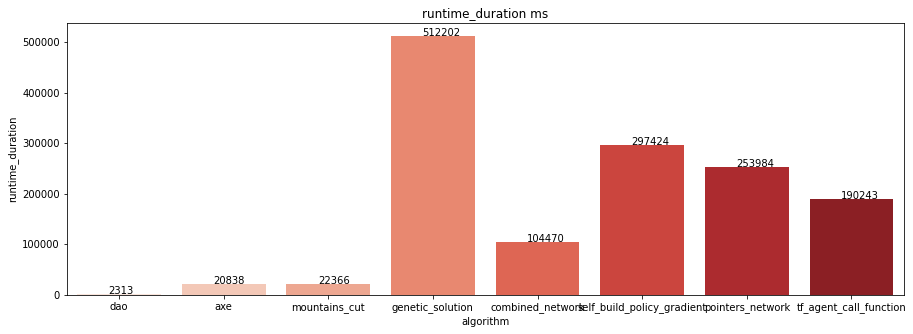

### Results open-close graph all algorithems

Compare the output results the different algorithms produced.

This is an explanation of the scoring:

This comparison does not have a score.
By visually analyzing the obtained graphs, we will describe briefly the differences observed.

Comparing the graphs makes it very easy to understand what each algorithm does, and leads to a more in-depth understanding of how each algorithm can be improved.

We chose to display results of two different runs of the notebook, to show the difference obtained for the learning algorithms.

**Analyses of classical algorithms**

Because the algorithms are deterministic, the results are the same in both runs.
As can be seen from the graph, each of the classical algorithms provides a slight improvement to the problem, but they do not fully resolve it.

Among the classic algorithms, the best is: **Mountains_cut**

An example for Mountains_cut's solutions not being optimal can be seen in the fifth peak to the right, where the algorithm allows ventilation to be open, despite a higher level of pollution there than it did with earlier closures. One could argue that earlier closures result in greater pollution savings, which is true, but not relevant to the Mountains_cut algorithm because it doesn't factor in this parameter.

**Analyses of Genetic algorithm**

Examining the images from the two different runs, it is apparent that the algorithm does return non-deterministic results, meaning that each run is different.

It was very easy for the algorithm to study the regulatory limitations. In approximately 50 generations, we observe that the algorithm has an average score of (-1.0), which is a valid openness-closing result.

We saw a slight improvement after training for another 50 generations, but not more (subsequent generations: 100-500 did not improve the algorithm's results).

A comparison of the results of the Genetic_algorithm algorithm with the Mountains_cut algorithm reveals that most of the places that it is obvious the algorithm needs to close were occupied (all the "peaks" in the pollution outside).

In some cases, the closures appear during the middle of the day when the pollution outside is at a low point, so it's clear that if we open them, we can close them later when the pollution begins to rise, thus improving the score of choice.
The likelihood of a mutation in opening or closing the "correctness" is relatively low. Maybe if we add more generations to the algorithm, we will be able to improve its performance? We tried it and it didn't changed.

**Analyses of Learning algorithm**

Observing pictures from the two different runs, we can see that the algorithms acquired different things from each run.

The **combined_network** algorithm learned that it should open all the time to avoid regulatory penalties, and tried to close at the edges, which resulted in a -13 (see blue graph).

As for **self_build_policy_gradient**, there is indication that it considered the regulations, but not fully understand it. Nor did it examine "peaks" of pollution problems.
The algorithm seems to have chosen randomly what to open and close, and failed to learn and improve.

**pointers_network** seems to not work, as it didn't learned the regulation.

                      **tf_agent_call_function** seems to not understand the regulation nor pollutions peaks. Just randomly open and close.


In [ ]:
def show_all_graphs(working_algorithms, algorithms_decisions):
    row_count = (len(working_algorithms)+1)//2
    fig, axes = plt.subplots(row_count, 2, figsize=(50,30))
    # axes: ((ax1, ax2, ax3), (ax4, ax5, ax6))

    for ax_number, algo_name in zip(range(len(working_algorithms)), working_algorithms):
      i, j = (ax_number)//2, (ax_number)%2
      print(f"algo={algo_name}, ax_number={ax_number}, i={i}, j={j}")
      score, indoor_air = iaqScore(day_to_use, algorithms_decisions[algo_name])
      fill_ax_for_ploting_decisions(axes[i][j], example_day, indoor_air, algorithms_decisions[algo_name])
      axes[i][j].set_title(algo_name, fontweight ="bold", fontsize=40)
      
    fig.tight_layout()

In [ ]:
for i in algorithms_decisions:
  print(i)

In [ ]:
working_algorithms = ["dao",
                      "axe",
                      "mountains_cut",
                      "genetic_solution",
                      "combined_network",
                      "self_build_policy_gradient",
                      "pointers_network",
                      "tf_agent_call_function"]

show_all_graphs(working_algorithms, algorithms_decisions)


The next cell show a comparison between all the working algorithms:

Full run of the notebook: #1
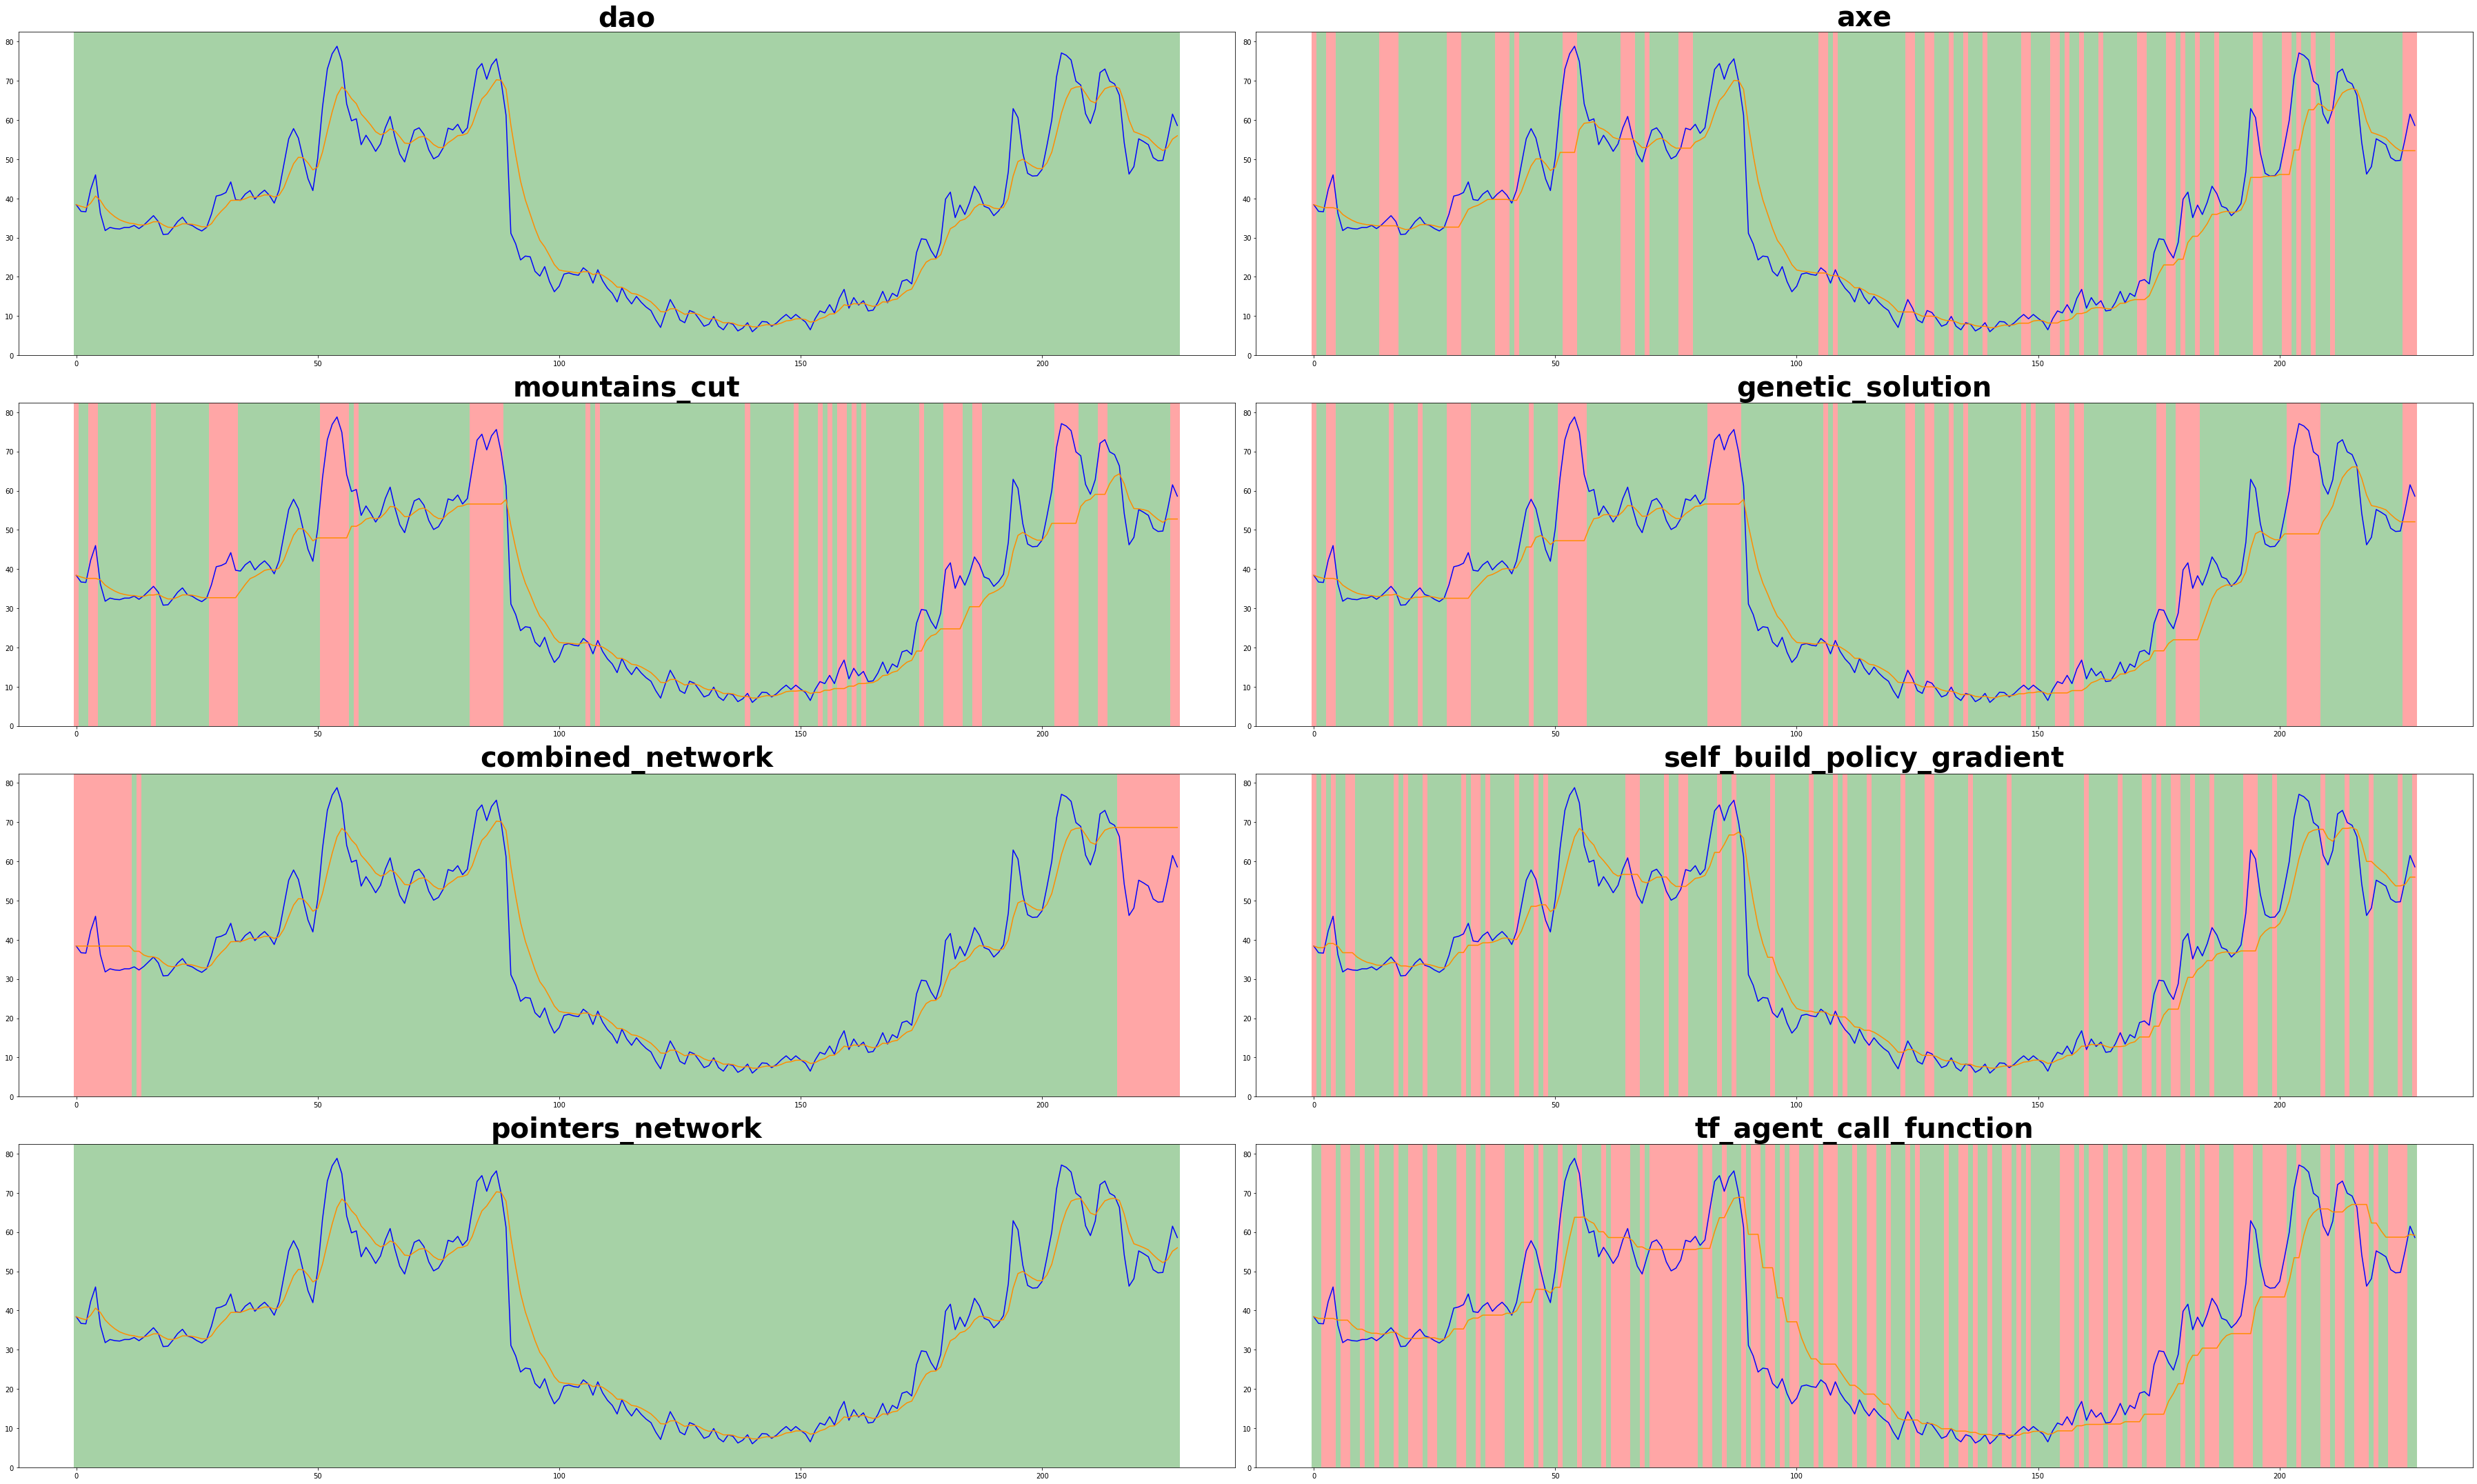


Full run of the notebook: #2
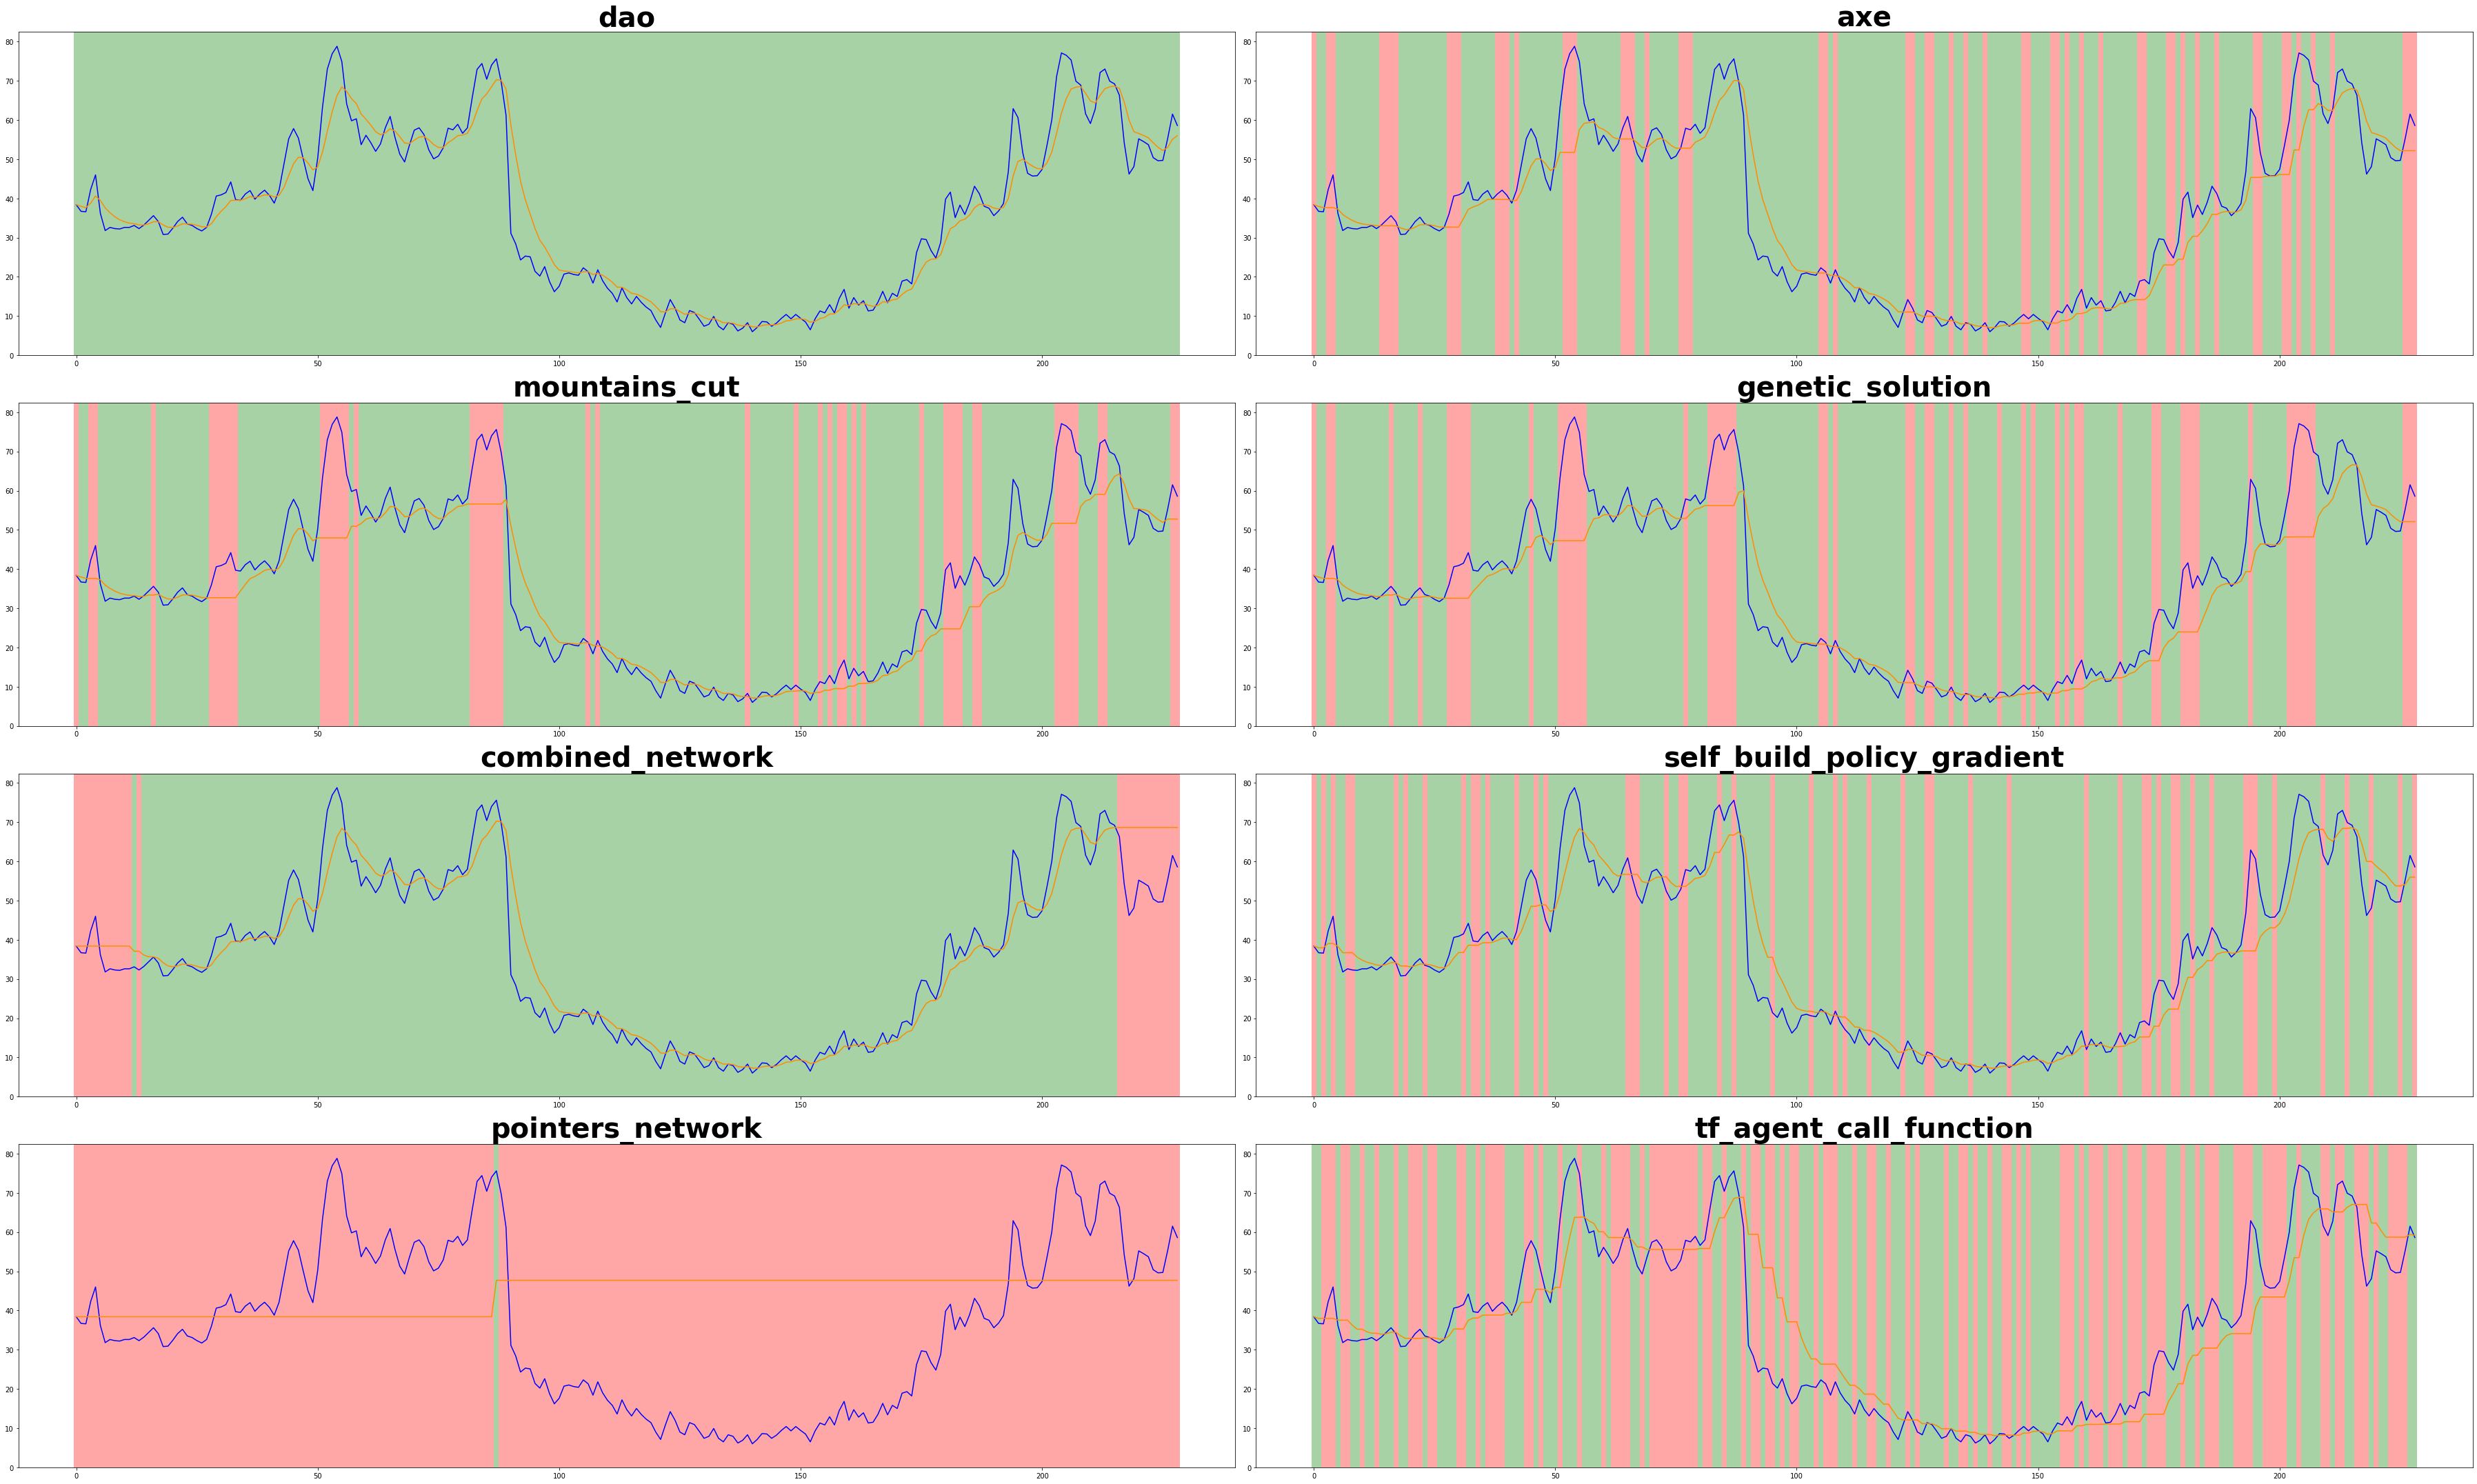

## Summary of our project work process and the lessons learned

What did the results turn out like and did we get a satisfactory result?

Despite our best efforts, we were not able to solve the problem. It was our expectation that a neural network (deep learning) would be able to provide a more comprehensive solution to the problem, but in practice we were not able to train a network to produce good results for a single day, which is the beginning of solving the general problem.

Based on the scope of our work, the genetic algorithm was the most appropriate choice. Due to its flexibility, it can accept any day and any set of constraints, and we can always trust it to provide a reasonable solution. As a disadvantage, it takes a long time to run every time, and if on the way he chooses a route that leads to a local minimum, it is difficult to get out of it. As well, the algorithm is not deterministic. Different runs will result in different results, even for the same restrictions and day.

What new tools did we learn?

1. Python notebooks, google colab: for colabrative work.
2. Genetic algorithm
3. tensorflow.keras
4. tf_agents: tensorflow RL framework.
5. Combinatorial problem-solving approaches
6. **visualisation:** The importance of visualisation to understand the problem and the solution.

Which tricks did we learn?

1. Create a generator to simulate data.
2. To engage the problem from different angle every time that things not going well.
3. That improvments to the runtime of the training make life better.
4. To play with the hyper-parameters can change the results of the network.
5. You can use ANN as the loss function for other ANNs.

Working together

Rea:

My partner Chai taught me a great deal, and whenever I was in despair I knew talking to him would be helpful, both mentally and practically.
The pace of work was problematic, and I take responsibility for a large part of it. In some areas, I could have been more systematic and organized. Despite my good intentions to work on the project, I sometimes lacked the practical ability to actually implement it.
I learned a lot from this project, and also from working with Chai. As we talked about what needed to be done, we seemed to have a common understanding, and I enjoyed working together. Thank you, Chai.

Chai:

I had great belife in the project, and really wanted to solve the problem we chosed.
I'm a bit disapointed with the results, since we couldnt even over fit for the first and simplest part of the problem we chosed.
I found the project to be very interesting because it allowed me to use and implement my knowledge of data science.

A few words about the future...

Rea:

My toolbox has been enhanced with data science and machine learning, and now I know how to use them when the right nuts fall into place.

From the course and project, I also learned the importance of proper visualization. I have already used the visualization tools I learned in the course at work over the past year (since I took the course) and this has improved my ability to analyze problems and provide data-based solutions for them.